a complete Web scraping of flipkart refridgerators raw data and EDA process along with problem statements are done clearly

## Analysis on Flipkart Refridgerators data

### modules to be imported

In [35]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import requests
from bs4 import BeautifulSoup

import re
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Collecting Data using Beautiful Soup

### links for flipkart data 
https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/triple-door~type/pr?sid=j9e,abm,hzg&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Triple%20door'

In [3]:
#Generating URLs
urls = []
door_types = ['Single','Double']

for door_type in door_types:
    for page_number in range (1,10):
        urls.append('https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/'+door_type+'-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_'+door_type+'+Door&page='+str(page_number))

urls.append('https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/triple-door~type/pr?sid=j9e,abm,hzg&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Triple%20door')
urls

['https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=1',
 'https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=2',
 'https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=3',
 'https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=4',
 'https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=5',
 'https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Applianc

# Scraping Flipkart for varieties of Fridges

In [59]:
class_for_Fridgename = '_3wU53n'
class_for_rating = 'hGSR34'
class_for_features = 'tVe95H'
class_for_price = '_1vC4OE _2rQ-NK'
class_for_Others = '_3_G5Wj'

class_for_EMIOption = '_3_G5Wj'

all_Fridge_name = []
all_Fridge_price = []
all_Fridge_rating = []
all_Fridge_features = []
all_Fridge_Offers = []
all_Fridge_EMIOption = []


for i in range(len(urls)):
    URL = urls[i]
    page = requests.get(URL)
    soupdata = BeautifulSoup(page.text)
    
    for x in soupdata.find_all('div', attrs={'class':'_1-2Iqu row'}):
        try:
            FridgeName = x.find('div',attrs={'class':class_for_Fridgename}).text
        except AttributeError:
            FridgeName = np.NaN
        try:
            Fridgeprice = x.find('div',attrs={'class':class_for_price}).text
        except AttributeError:
            Fridgeprice = np.NaN
        try:
            Fridgerating = x.find('div',attrs={'class':class_for_rating}).text
        except AttributeError:
            Fridgerating = np.NaN
        try:
            FridgeOffers = x.find('div',attrs={'class':class_for_Others, 'style':'color:#000000;font-size:14px;font-family:inherit;font-weight:bold'}).text[1:].replace(',','')
        except AttributeError:
            FridgeOffers = 0
        try:
            FridgeEMIOption = x.find('div',attrs={'class':class_for_EMIOption, 'style':'color:#000000;font-size:12px;font-family:inherit;font-weight:normal'}).text
        except AttributeError:
            FridgeEMIOption = np.NaN
        try:
            this_Fridgefeatures=""
            Fridgefeatures = x.find_all('li',attrs={'class':class_for_features})
            for item in Fridgefeatures:
                this_Fridgefeatures += item.text +"\n"
        except AttributeError:
            Fridgefeatures = np.NaN
            
            
        all_Fridge_name.append(FridgeName)
        all_Fridge_price.append(Fridgeprice)
        all_Fridge_rating.append(Fridgerating)
        all_Fridge_features.append(this_Fridgefeatures)
        all_Fridge_Offers.append(float(FridgeOffers))
        all_Fridge_EMIOption.append(FridgeEMIOption)
    print("Loaded URL --> "+URL)
    

Loaded URL --> https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=1
Loaded URL --> https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=2
Loaded URL --> https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=3
Loaded URL --> https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=4
Loaded URL --> https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-door~type/pr?sid=j9e%2Cabm%2Chzg&otracker=nmenu_sub_TVs+%26+Appliances_0_Single+Door&page=5
Loaded URL --> https://www.flipkart.com/home-kitchen/home-appliances/refrigerators/Single-

In [64]:
all_Fridge_name

['Samsung 192 L Direct Cool Single Door 4 Star (2020) Refrigerator with Base Drawer',
 'Samsung 192 L Direct Cool Single Door 2 Star (2020) Refrigerator',
 'Samsung 192 L Direct Cool Single Door 4 Star (2020) Refrigerator with Base Drawer',
 'Haier 195 L Direct Cool Single Door 4 Star (2020) Refrigerator',
 'Samsung 198 L Direct Cool Single Door 5 Star (2020) Refrigerator with Base Drawer',
 'Samsung 198 L Direct Cool Single Door 5 Star (2020) Refrigerator',
 'Godrej 190 L Direct Cool Single Door 5 Star (2020) Refrigerator  with Base Drawer and Intelligent Inve...',
 'Samsung 212 L Direct Cool Single Door 3 Star (2020) Refrigerator',
 'LG 190 L Direct Cool Single Door 4 Star (2020) Refrigerator with Base Drawer',
 'Godrej 190 L Direct Cool Single Door 2 Star (2020) Refrigerator  with In-built MP3 Player',
 'Whirlpool 190 L Direct Cool Single Door 2 Star (2020) Refrigerator',
 'Samsung 192 L Direct Cool Single Door 2 Star (2020) Refrigerator',
 'Whirlpool 190 L Direct Cool Single Door 4

In [65]:
len(all_Fridge_name)

422

# Cleaning of scraped data

In [66]:
all_Fridge_price

['₹15,890',
 '₹11,790',
 '₹15,890',
 '₹12,490',
 '₹17,290',
 '₹16,290',
 '₹15,790',
 '₹14,850',
 '₹15,890',
 '₹12,990',
 '₹10,790',
 '₹12,790',
 '₹14,490',
 '₹14,390',
 '₹14,690',
 '₹11,490',
 '₹15,890',
 '₹17,750',
 '₹12,290',
 '₹14,990',
 '₹11,090',
 '₹15,190',
 '₹9,990',
 '₹11,490',
 '₹10,490',
 '₹9,990',
 '₹15,490',
 '₹12,290',
 '₹12,790',
 '₹11,490',
 '₹12,990',
 '₹8,999',
 '₹10,990',
 '₹13,890',
 '₹18,240',
 '₹11,490',
 '₹11,490',
 '₹14,790',
 '₹13,990',
 '₹10,999',
 '₹14,890',
 '₹17,490',
 '₹19,490',
 '₹19,790',
 '₹14,990',
 '₹10,790',
 '₹13,490',
 '₹13,790',
 '₹13,490',
 '₹13,899',
 '₹19,290',
 '₹12,490',
 '₹9,790',
 '₹10,790',
 '₹10,490',
 '₹15,399',
 '₹12,490',
 '₹18,190',
 '₹19,790',
 '₹14,990',
 '₹14,990',
 '₹11,490',
 '₹14,490',
 '₹19,490',
 '₹8,490',
 '₹17,290',
 '₹9,990',
 '₹14,790',
 '₹13,890',
 '₹18,400',
 '₹16,990',
 '₹15,590',
 '₹18,740',
 '₹6,190',
 '₹16,240',
 '₹17,240',
 '₹15,490',
 '₹14,590',
 '₹13,790',
 '₹14,990',
 '₹13,448',
 '₹14,490',
 '₹13,288',
 '₹16,210',

In [67]:
fridge_names = []
for s in all_Fridge_name:
    s = s.split()[0]
    fridge_names.append(s)
fridge_names

['Samsung',
 'Samsung',
 'Samsung',
 'Haier',
 'Samsung',
 'Samsung',
 'Godrej',
 'Samsung',
 'LG',
 'Godrej',
 'Whirlpool',
 'Samsung',
 'Whirlpool',
 'Samsung',
 'Samsung',
 'Whirlpool',
 'LG',
 'Samsung',
 'Godrej',
 'LG',
 'Samsung',
 'Godrej',
 'Haier',
 'Whirlpool',
 'Onida',
 'Haier',
 'Whirlpool',
 'Whirlpool',
 'Samsung',
 'Haier',
 'Whirlpool',
 'MarQ',
 'Godrej',
 'Samsung',
 'Whirlpool',
 'Whirlpool',
 'Whirlpool',
 'Godrej',
 'LG',
 'MarQ',
 'LG',
 'Samsung',
 'LG',
 'LG',
 'Whirlpool',
 'Whirlpool',
 'Whirlpool',
 'Haier',
 'Whirlpool',
 'Samsung',
 'LG',
 'Whirlpool',
 'Haier',
 'Whirlpool',
 'Onida',
 'LG',
 'Whirlpool',
 'LG',
 'Samsung',
 'LG',
 'LG',
 'Haier',
 'Whirlpool',
 'LG',
 'Hisense',
 'LG',
 'Haier',
 'Haier',
 'Samsung',
 'Samsung',
 'LG',
 'LG',
 'Whirlpool',
 'Godrej',
 'Whirlpool',
 'Whirlpool',
 'Whirlpool',
 'Samsung',
 'Haier',
 'Whirlpool',
 'Whirlpool',
 'Whirlpool',
 'Whirlpool',
 'Samsung',
 'Whirlpool',
 'MarQ',
 'LG',
 'Whirlpool',
 'Samsung',
 

In [68]:
# Rough work
# class_for_laptopname = '_3_G5Wj'
# soupdata.find_all('div',attrs={'class':class_for_laptopname,'style':'color:#000000;font-size:12px;font-family:inherit;font-weight:normal'})

#all_Fridge_features[10].split('\n')
all_Fridge_features

['Digital Inverter Compressor\n4 Star : For Energy savings up to 45%\nToughened Glass Shelves\n192 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year on Product and 10 Years on Compressor From Samsung\n',
 'Normal Compressor\n2 Star : For Energy savings up to 20%\nToughened Glass Shelves\n192 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year on Product and 10 Years on Compressor From Samsung\n',
 'Digital Inverter Compressor\n4 Star : For Energy savings up to 45%\nToughened Glass Shelves\n192 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year on Product and 10 Years on Compressor From Samsung\n',
 'Reciprocatory Compressor\n4 Star : For Energy savings up to 45%\nToughened Glass Shelves\n195 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year Warranty on Product and 10 Years on Compressor\n',
 'Digital Inverter Compressor\n5 Star

In [69]:
all_Fridge_features[3].split('\n')

['Reciprocatory Compressor',
 '4 Star : For Energy savings up to 45%',
 'Toughened Glass Shelves',
 '195 L : Good for couples and small families',
 'Built-in Stabilizer',
 '2020 BEE Rating Year',
 '1 Year Warranty on Product and 10 Years on Compressor',
 '']

In [71]:
compressor_warranty = re.findall(r'\d+ Years',str(all_Fridge_features))
compressor_warranty

['10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '1

In [72]:
compressor_warr = compressor_warranty[:400]
compressor_warr

['10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '5 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '10 Years',
 '1

In [73]:
product_warranty = re.findall(r'1 Year', str(all_Fridge_features))
product_warranty

['1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',

In [74]:
product_warr = product_warranty[:400]
product_warr

['1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',
 '1 Year',

In [75]:
all_ = []
for j in all_Fridge_features:
    j = j.split('\n')
    all_.append(j)
all_

[['Digital Inverter Compressor',
  '4 Star : For Energy savings up to 45%',
  'Toughened Glass Shelves',
  '192 L : Good for couples and small families',
  'Built-in Stabilizer',
  '2020 BEE Rating Year',
  '1 Year on Product and 10 Years on Compressor From Samsung',
  ''],
 ['Normal Compressor',
  '2 Star : For Energy savings up to 20%',
  'Toughened Glass Shelves',
  '192 L : Good for couples and small families',
  'Built-in Stabilizer',
  '2020 BEE Rating Year',
  '1 Year on Product and 10 Years on Compressor From Samsung',
  ''],
 ['Digital Inverter Compressor',
  '4 Star : For Energy savings up to 45%',
  'Toughened Glass Shelves',
  '192 L : Good for couples and small families',
  'Built-in Stabilizer',
  '2020 BEE Rating Year',
  '1 Year on Product and 10 Years on Compressor From Samsung',
  ''],
 ['Reciprocatory Compressor',
  '4 Star : For Energy savings up to 45%',
  'Toughened Glass Shelves',
  '195 L : Good for couples and small families',
  'Built-in Stabilizer',
  '2020 B

In [77]:
compressor_types=[]

for i in all_Fridge_features:
    i = i.split('\n')
    compressor_types.append(i[0])
compressor_types

['Digital Inverter Compressor',
 'Normal Compressor',
 'Digital Inverter Compressor',
 'Reciprocatory Compressor',
 'Digital Inverter Compressor',
 'Digital Inverter Compressor',
 'Hygiene Plus Inverter Compressor',
 'Digital Inverter Compressor',
 'Smart Inverter Compressor',
 'Reciprocating',
 'Normal Compressor',
 'Normal Compressor',
 'DC Inverter Compressor',
 'Digital Inverter Compressor',
 'Digital Inverter Compressor',
 'Normal Compressor',
 'Smart Inverter Compressor',
 'Digital Inverter Compressor',
 'Inverter',
 'Smart Inverter Compressor',
 'Normal Compressor',
 'Hygiene Plus Inverter Compressor',
 'Reciprocatory Compressor',
 'Normal Compressor',
 'Reciprocatory Compressor',
 'Reciprocatory Compressor',
 'DC Inverter Compressor',
 'Non Inverter Compressor',
 'Normal Compressor',
 'Reciprocatory Compressor',
 'DC Inverter Compressor',
 'Reciprocatory Compressor',
 'Reciprocatory Compressor',
 'Digital Inverter Compressor',
 'DC Inverter Compressor',
 'Normal Compressor',
 '

In [78]:
stars = []

for i in all_Fridge_features:
    i = i.split('\n')
    stars.append(i[1])
stars

['4 Star : For Energy savings up to 45%',
 '2 Star : For Energy savings up to 20%',
 '4 Star : For Energy savings up to 45%',
 '4 Star : For Energy savings up to 45%',
 '5 Star : For Energy savings up to 55%',
 '5 Star : For Energy savings up to 55%',
 '5 Star : For Energy savings up to 55%',
 '3 Star : For Energy savings up to 35%',
 '4 Star : For Energy savings up to 45%',
 '2 Star : For Energy savings up to 20%',
 '2 Star : For Energy savings up to 20%',
 '2 Star : For Energy savings up to 20%',
 '4 Star : For Energy savings up to 45%',
 '4 Star : For Energy savings up to 45%',
 '4 Star : For Energy savings up to 45%',
 '3 Star : For Energy savings up to 35%',
 '4 Star : For Energy savings up to 45%',
 '3 Star : For Energy savings up to 35%',
 '3 Star : For Energy savings up to 35%',
 '4 Star : For Energy savings up to 45%',
 '1 Star',
 '5 Star : For Energy savings up to 55%',
 '2 Star : For Energy savings up to 20%',
 '2 Star : For Energy savings up to 20%',
 '3 Star : For Energy s

In [79]:
len(stars)

422

In [80]:
energy_saving = re.findall(r'\d\d', str(stars))
energy_saving

['45',
 '20',
 '45',
 '45',
 '55',
 '55',
 '55',
 '35',
 '45',
 '20',
 '20',
 '20',
 '45',
 '45',
 '45',
 '35',
 '45',
 '35',
 '35',
 '45',
 '55',
 '20',
 '20',
 '35',
 '20',
 '45',
 '35',
 '20',
 '20',
 '45',
 '20',
 '20',
 '35',
 '55',
 '35',
 '35',
 '45',
 '45',
 '35',
 '45',
 '55',
 '45',
 '45',
 '35',
 '20',
 '45',
 '35',
 '45',
 '35',
 '45',
 '20',
 '20',
 '20',
 '35',
 '45',
 '20',
 '45',
 '35',
 '45',
 '45',
 '20',
 '45',
 '45',
 '45',
 '20',
 '45',
 '35',
 '55',
 '45',
 '45',
 '55',
 '30',
 '45',
 '55',
 '45',
 '35',
 '35',
 '35',
 '35',
 '45',
 '35',
 '45',
 '45',
 '20',
 '35',
 '35',
 '35',
 '35',
 '45',
 '45',
 '35',
 '35',
 '45',
 '45',
 '35',
 '35',
 '55',
 '35',
 '45',
 '35',
 '20',
 '20',
 '45',
 '45',
 '35',
 '45',
 '35',
 '35',
 '45',
 '35',
 '45',
 '35',
 '35',
 '20',
 '45',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '20',
 '35',
 '35',
 '20',
 '35',
 '20',
 '55',
 '35',
 '45',
 '45',
 '20',
 '35',
 '35',
 '20',
 '45',
 '20',
 '45',
 '35',
 '45',
 '35',
 '35',
 '35',

In [81]:
len(energy_saving)

402

In [82]:
energysavin = energy_saving[:400]
energysavin

['45',
 '20',
 '45',
 '45',
 '55',
 '55',
 '55',
 '35',
 '45',
 '20',
 '20',
 '20',
 '45',
 '45',
 '45',
 '35',
 '45',
 '35',
 '35',
 '45',
 '55',
 '20',
 '20',
 '35',
 '20',
 '45',
 '35',
 '20',
 '20',
 '45',
 '20',
 '20',
 '35',
 '55',
 '35',
 '35',
 '45',
 '45',
 '35',
 '45',
 '55',
 '45',
 '45',
 '35',
 '20',
 '45',
 '35',
 '45',
 '35',
 '45',
 '20',
 '20',
 '20',
 '35',
 '45',
 '20',
 '45',
 '35',
 '45',
 '45',
 '20',
 '45',
 '45',
 '45',
 '20',
 '45',
 '35',
 '55',
 '45',
 '45',
 '55',
 '30',
 '45',
 '55',
 '45',
 '35',
 '35',
 '35',
 '35',
 '45',
 '35',
 '45',
 '45',
 '20',
 '35',
 '35',
 '35',
 '35',
 '45',
 '45',
 '35',
 '35',
 '45',
 '45',
 '35',
 '35',
 '55',
 '35',
 '45',
 '35',
 '20',
 '20',
 '45',
 '45',
 '35',
 '45',
 '35',
 '35',
 '45',
 '35',
 '45',
 '35',
 '35',
 '20',
 '45',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '20',
 '35',
 '35',
 '20',
 '35',
 '20',
 '55',
 '35',
 '45',
 '45',
 '20',
 '35',
 '35',
 '20',
 '45',
 '20',
 '45',
 '35',
 '45',
 '35',
 '35',
 '35',

In [83]:
len(energysavin)

400

In [84]:
star_rate = re.findall(r'\d\sStar', str(stars))
star_rate

['4 Star',
 '2 Star',
 '4 Star',
 '4 Star',
 '5 Star',
 '5 Star',
 '5 Star',
 '3 Star',
 '4 Star',
 '2 Star',
 '2 Star',
 '2 Star',
 '4 Star',
 '4 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '1 Star',
 '5 Star',
 '2 Star',
 '2 Star',
 '3 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '2 Star',
 '2 Star',
 '4 Star',
 '2 Star',
 '2 Star',
 '3 Star',
 '5 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '5 Star',
 '4 Star',
 '4 Star',
 '3 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '2 Star',
 '2 Star',
 '2 Star',
 '3 Star',
 '4 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '4 Star',
 '2 Star',
 '4 Star',
 '4 Star',
 '1 Star',
 '4 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '5 Star',
 '4 Star',
 '4 Star',
 '5 Star',
 '4 Star',
 '5 Star',
 '4 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '4 Star',
 '2 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '4 Star',

In [85]:
star_rate_ = star_rate[:400]
star_rate_

['4 Star',
 '2 Star',
 '4 Star',
 '4 Star',
 '5 Star',
 '5 Star',
 '5 Star',
 '3 Star',
 '4 Star',
 '2 Star',
 '2 Star',
 '2 Star',
 '4 Star',
 '4 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '1 Star',
 '5 Star',
 '2 Star',
 '2 Star',
 '3 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '2 Star',
 '2 Star',
 '4 Star',
 '2 Star',
 '2 Star',
 '3 Star',
 '5 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '5 Star',
 '4 Star',
 '4 Star',
 '3 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '2 Star',
 '2 Star',
 '2 Star',
 '3 Star',
 '4 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '4 Star',
 '2 Star',
 '4 Star',
 '4 Star',
 '1 Star',
 '4 Star',
 '2 Star',
 '4 Star',
 '3 Star',
 '5 Star',
 '4 Star',
 '4 Star',
 '5 Star',
 '4 Star',
 '5 Star',
 '4 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '3 Star',
 '4 Star',
 '4 Star',
 '2 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '3 Star',
 '4 Star',
 '4 Star',

In [86]:
fridge_inside = []
for i in all_Fridge_features:
    i = i.split('\n')
    fridge_inside.append(i[2])
fridge_inside

['Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Wired Shelves',
 'Toughened Gl

In [87]:
fridg_inside = fridge_inside[:400]
fridg_inside

['Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Toughened Glass Shelves',
 'Toughened Glass Shelves',
 'Wired Shelves',
 'Wired Shelves',
 'Toughened Gl

In [88]:
capacity = re.findall(r'\d+\sL', str(all_Fridge_features))
capacity
len(capacity)

['192 L',
 '192 L',
 '192 L',
 '195 L',
 '198 L',
 '198 L',
 '190 L',
 '212 L',
 '190 L',
 '190 L',
 '190 L',
 '192 L',
 '190 L',
 '192 L',
 '192 L',
 '190 L',
 '190 L',
 '230 L',
 '190 L',
 '190 L',
 '192 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '200 L',
 '190 L',
 '192 L',
 '190 L',
 '190 L',
 '170 L',
 '190 L',
 '192 L',
 '215 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '195 L',
 '190 L',
 '198 L',
 '235 L',
 '235 L',
 '200 L',
 '190 L',
 '190 L',
 '220 L',
 '190 L',
 '192 L',
 '235 L',
 '190 L',
 '170 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '215 L',
 '255 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '235 L',
 '93 L',
 '215 L',
 '181 L',
 '195 L',
 '192 L',
 '198 L',
 '215 L',
 '190 L',
 '215 L',
 '30 L',
 '215 L',
 '215 L',
 '200 L',
 '192 L',
 '220 L',
 '200 L',
 '200 L',
 '200 L',
 '200 L',
 '198 L',
 '200 L',
 '170 L',
 '270 L',
 '200 L',
 '192 L',
 '192 L',
 '190 L',
 '190 L',
 '192 L',
 '190 L',
 '198 L',
 '215 L',
 '190 L',
 '192 L',
 '235 L',
 '190 L',
 '

421

In [89]:
capacity_ = capacity[:400]
capacity_

['192 L',
 '192 L',
 '192 L',
 '195 L',
 '198 L',
 '198 L',
 '190 L',
 '212 L',
 '190 L',
 '190 L',
 '190 L',
 '192 L',
 '190 L',
 '192 L',
 '192 L',
 '190 L',
 '190 L',
 '230 L',
 '190 L',
 '190 L',
 '192 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '200 L',
 '190 L',
 '192 L',
 '190 L',
 '190 L',
 '170 L',
 '190 L',
 '192 L',
 '215 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '195 L',
 '190 L',
 '198 L',
 '235 L',
 '235 L',
 '200 L',
 '190 L',
 '190 L',
 '220 L',
 '190 L',
 '192 L',
 '235 L',
 '190 L',
 '170 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '215 L',
 '255 L',
 '190 L',
 '190 L',
 '190 L',
 '190 L',
 '235 L',
 '93 L',
 '215 L',
 '181 L',
 '195 L',
 '192 L',
 '198 L',
 '215 L',
 '190 L',
 '215 L',
 '30 L',
 '215 L',
 '215 L',
 '200 L',
 '192 L',
 '220 L',
 '200 L',
 '200 L',
 '200 L',
 '200 L',
 '198 L',
 '200 L',
 '170 L',
 '270 L',
 '200 L',
 '192 L',
 '192 L',
 '190 L',
 '190 L',
 '192 L',
 '190 L',
 '198 L',
 '215 L',
 '190 L',
 '192 L',
 '235 L',
 '190 L',
 '

In [90]:
adapt_type = []
for i in all_Fridge_features:
    i = i.split('\n')
    adapt_type.append(i[3])
adapt_type

['192 L : Good for couples and small families',
 '192 L : Good for couples and small families',
 '192 L : Good for couples and small families',
 '195 L : Good for couples and small families',
 '198 L : Good for couples and small families',
 '198 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '212 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '192 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '192 L : Good for couples and small families',
 '192 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '230 L',
 '190 L : Good for couples and small families',
 '190 L : Good for couples and small families',
 '192 L : Good for couples and small families',
 '190 L : Good for couples and

In [91]:
apadtablity_type = re.findall(r'Good for +\w+',str(adapt_type))
apadtablity_type

['Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for families',
 'Good for families',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for 

In [92]:
adapt_type=apadtablity_type[:400]
adapt_type

['Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for families',
 'Good for families',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for couples',
 'Good for 

In [93]:
all_Fridge_features

['Digital Inverter Compressor\n4 Star : For Energy savings up to 45%\nToughened Glass Shelves\n192 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year on Product and 10 Years on Compressor From Samsung\n',
 'Normal Compressor\n2 Star : For Energy savings up to 20%\nToughened Glass Shelves\n192 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year on Product and 10 Years on Compressor From Samsung\n',
 'Digital Inverter Compressor\n4 Star : For Energy savings up to 45%\nToughened Glass Shelves\n192 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year on Product and 10 Years on Compressor From Samsung\n',
 'Reciprocatory Compressor\n4 Star : For Energy savings up to 45%\nToughened Glass Shelves\n195 L : Good for couples and small families\nBuilt-in Stabilizer\n2020 BEE Rating Year\n1 Year Warranty on Product and 10 Years on Compressor\n',
 'Digital Inverter Compressor\n5 Star

In [105]:
stabilizer = re.findall(r'\w+-\w+ Stabilizer',str(all_Fridge_features) )
stabilizer

['nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',


In [106]:
len(stabilizer)

399

In [141]:
all_Fridge_price

['₹15,890',
 '₹11,790',
 '₹15,890',
 '₹12,490',
 '₹17,290',
 '₹16,290',
 '₹15,790',
 '₹14,850',
 '₹15,890',
 '₹12,990',
 '₹10,790',
 '₹12,790',
 '₹14,490',
 '₹14,390',
 '₹14,690',
 '₹11,490',
 '₹15,890',
 '₹17,750',
 '₹12,290',
 '₹14,990',
 '₹11,090',
 '₹15,190',
 '₹9,990',
 '₹11,490',
 '₹10,490',
 '₹9,990',
 '₹15,490',
 '₹12,290',
 '₹12,790',
 '₹11,490',
 '₹12,990',
 '₹8,999',
 '₹10,990',
 '₹13,890',
 '₹18,240',
 '₹11,490',
 '₹11,490',
 '₹14,790',
 '₹13,990',
 '₹10,999',
 '₹14,890',
 '₹17,490',
 '₹19,490',
 '₹19,790',
 '₹14,990',
 '₹10,790',
 '₹13,490',
 '₹13,790',
 '₹13,490',
 '₹13,899',
 '₹19,290',
 '₹12,490',
 '₹9,790',
 '₹10,790',
 '₹10,490',
 '₹15,399',
 '₹12,490',
 '₹18,190',
 '₹19,790',
 '₹14,990',
 '₹14,990',
 '₹11,490',
 '₹14,490',
 '₹19,490',
 '₹8,490',
 '₹17,290',
 '₹9,990',
 '₹14,790',
 '₹13,890',
 '₹18,400',
 '₹16,990',
 '₹15,590',
 '₹18,740',
 '₹6,190',
 '₹16,240',
 '₹17,240',
 '₹15,490',
 '₹14,590',
 '₹13,790',
 '₹14,990',
 '₹13,448',
 '₹14,490',
 '₹13,288',
 '₹16,210',

In [142]:
len(all_Fridge_price)

422

In [108]:
prices = re.findall(r'\d,\d{3}|\d\d,\d{3}|nan',str(all_Fridge_price))
prices

['15,890',
 '11,790',
 '15,890',
 '12,490',
 '17,290',
 '16,290',
 '15,790',
 '14,850',
 '15,890',
 '12,990',
 '10,790',
 '12,790',
 '14,490',
 '14,390',
 '14,690',
 '11,490',
 '15,890',
 '17,750',
 '12,290',
 '14,990',
 '11,090',
 '15,190',
 '9,990',
 '11,490',
 '10,490',
 '9,990',
 '15,490',
 '12,290',
 '12,790',
 '11,490',
 '12,990',
 '8,999',
 '10,990',
 '13,890',
 '18,240',
 '11,490',
 '11,490',
 '14,790',
 '13,990',
 '10,999',
 '14,890',
 '17,490',
 '19,490',
 '19,790',
 '14,990',
 '10,790',
 '13,490',
 '13,790',
 '13,490',
 '13,899',
 '19,290',
 '12,490',
 '9,790',
 '10,790',
 '10,490',
 '15,399',
 '12,490',
 '18,190',
 '19,790',
 '14,990',
 '14,990',
 '11,490',
 '14,490',
 '19,490',
 '8,490',
 '17,290',
 '9,990',
 '14,790',
 '13,890',
 '18,400',
 '16,990',
 '15,590',
 '18,740',
 '6,190',
 '16,240',
 '17,240',
 '15,490',
 '14,590',
 '13,790',
 '14,990',
 '13,448',
 '14,490',
 '13,288',
 '16,210',
 '16,490',
 '8,999',
 '22,990',
 '14,430',
 '13,790',
 '13,820',
 '15,190',
 '14,99

In [191]:
prices = []

price = []

for p in all_Fridge_price:
    d=p.replace('₹','').replace(',','')
    prices.append(d)
#prices

for item in prices:
    price.append(float(item))
price
    

[15890.0,
 11790.0,
 15890.0,
 12490.0,
 17290.0,
 16290.0,
 15790.0,
 14850.0,
 15890.0,
 12990.0,
 10790.0,
 12790.0,
 14490.0,
 14390.0,
 14690.0,
 11490.0,
 15890.0,
 17750.0,
 12290.0,
 14990.0,
 11090.0,
 15190.0,
 9990.0,
 11490.0,
 10490.0,
 9990.0,
 15490.0,
 12290.0,
 12790.0,
 11490.0,
 12990.0,
 8999.0,
 10990.0,
 13890.0,
 18240.0,
 11490.0,
 11490.0,
 14790.0,
 13990.0,
 10999.0,
 14890.0,
 17490.0,
 19490.0,
 19790.0,
 14990.0,
 10790.0,
 13490.0,
 13790.0,
 13490.0,
 13899.0,
 19290.0,
 12490.0,
 9790.0,
 10790.0,
 10490.0,
 15399.0,
 12490.0,
 18190.0,
 19790.0,
 14990.0,
 14990.0,
 11490.0,
 14490.0,
 19490.0,
 8490.0,
 17290.0,
 9990.0,
 14790.0,
 13890.0,
 18400.0,
 16990.0,
 15590.0,
 18740.0,
 6190.0,
 16240.0,
 17240.0,
 15490.0,
 14590.0,
 13790.0,
 14990.0,
 13448.0,
 14490.0,
 13288.0,
 16210.0,
 16490.0,
 8999.0,
 22990.0,
 14430.0,
 13790.0,
 13820.0,
 15190.0,
 14990.0,
 14999.0,
 12290.0,
 17700.0,
 17490.0,
 13990.0,
 14990.0,
 19990.0,
 14350.0,
 17000.0

In [183]:
type(price)

list

In [ ]:
#df1['Price'][1].replace('₹','').replace(',','')

In [281]:
type(ratings[1])

float

In [280]:
ratings = []

for item in all_Fridge_rating:
    ratings.append(float(item))
ratings

[4.5,
 4.4,
 4.5,
 4.4,
 4.5,
 4.5,
 4.5,
 4.3,
 4.4,
 4.3,
 4.3,
 4.3,
 4.3,
 4.4,
 4.4,
 4.3,
 4.3,
 4.4,
 4.3,
 4.4,
 4.2,
 nan,
 4.2,
 4.3,
 4.2,
 4.2,
 4.3,
 4.3,
 4.3,
 4.2,
 4.3,
 4.1,
 4.4,
 4.3,
 4.3,
 4.3,
 4.3,
 4.4,
 4.5,
 4.4,
 4.5,
 4.5,
 4.4,
 4.4,
 4.3,
 4.3,
 4.3,
 4.2,
 4.3,
 4.3,
 4.4,
 4.3,
 4.2,
 4.3,
 4.2,
 4.4,
 4.3,
 4.6,
 4.4,
 4.5,
 4.4,
 4.2,
 4.3,
 4.4,
 4.2,
 4.4,
 4.3,
 4.4,
 4.4,
 4.5,
 4.2,
 4.3,
 4.3,
 4.2,
 4.3,
 4.3,
 4.3,
 4.4,
 4.4,
 4.3,
 4.3,
 4.3,
 4.3,
 4.5,
 4.3,
 4.1,
 4.0,
 4.3,
 4.4,
 4.6,
 4.4,
 4.3,
 4.7,
 4.3,
 4.5,
 4.4,
 4.2,
 4.4,
 4.4,
 4.2,
 4.2,
 4.3,
 4.8,
 nan,
 4.4,
 nan,
 4.5,
 4.3,
 4.6,
 4.2,
 4.4,
 4.3,
 4.3,
 4.3,
 4.5,
 4.3,
 4.3,
 4.6,
 4.3,
 nan,
 4.3,
 nan,
 3.8,
 3.7,
 4.3,
 nan,
 nan,
 4.2,
 4.6,
 4.6,
 4.5,
 4.3,
 4.4,
 3.7,
 nan,
 nan,
 4.8,
 4.3,
 4.8,
 4.4,
 4.2,
 4.3,
 4.6,
 4.3,
 4.1,
 4.3,
 4.4,
 nan,
 4.6,
 4.4,
 4.3,
 4.6,
 4.6,
 4.3,
 nan,
 4.4,
 3.8,
 nan,
 4.4,
 nan,
 nan,
 4.4,
 4.4,
 4.5,
 4.8,
 4.4,
 nan

In [276]:
type(all_Fridge_rating)

list

In [279]:
type(price[2])

float

### making the cleaned data into pandas dataframe

In [346]:
# Gathering the structure 

df = pd.DataFrame({'ProductName':fridge_names, 'Price':price, 'Rating':ratings, 'ExchangeOffer': all_Fridge_Offers, 'EMIOption': all_Fridge_EMIOption})
df

,ProductName,Price,Rating,ExchangeOffer,EMIOption
0,Samsung,15890.0,4.5,12000.0,No Cost EMI
1,Samsung,11790.0,4.4,4500.0,No Cost EMI
2,Samsung,15890.0,4.5,12000.0,No Cost EMI
3,Haier,12490.0,4.4,4500.0,NaN
4,Samsung,17290.0,4.5,12000.0,No Cost EMI
...,...,...,...,...,...
417,Whirlpool,28490.0,4.4,12000.0,No Cost EMI
418,Whirlpool,24990.0,4.4,12000.0,No Cost EMI
419,Whirlpool,23990.0,4.4,12000.0,No Cost EMI
420,Whirlpool,25490.0,4.5,12000.0,No Cost EMI


In [347]:
df['compressortypes'] = compressor_types
df

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes
0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor
2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor
4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
...,...,...,...,...,...,...
417,Whirlpool,28490.0,4.4,12000.0,No Cost EMI,Normal Compressor
418,Whirlpool,24990.0,4.4,12000.0,No Cost EMI,Normal Compressor
419,Whirlpool,23990.0,4.4,12000.0,No Cost EMI,Normal Compressor
420,Whirlpool,25490.0,4.5,12000.0,No Cost EMI,Normal Compressor


In [348]:
df1=df.reindex(range(0,400))
df1

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes
0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor
2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor
4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
...,...,...,...,...,...,...
395,Samsung,28300.0,NaN,0.0,NaN,Digital Inverter Compressor
396,LG,26599.0,4.5,0.0,NaN,Smart Inverter Compressor
397,LG,26750.0,4.2,0.0,NaN,Digital Inverter Compressor
398,Voltas,26599.0,NaN,0.0,NaN,ProSmart Inverter Compressor


In [349]:
stabilizerr=stabilizer[:401]
stabilizerr

['nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',
 'nBuilt-in Stabilizer',


In [118]:
len(s)

9

In [113]:
df1['Stabilizers'] = stabilizerr
df1['Stabilizers']

ValueError: Length of values (399) does not match length of index (400)

In [350]:
df1

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes
0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor
2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor
4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor
...,...,...,...,...,...,...
395,Samsung,28300.0,NaN,0.0,NaN,Digital Inverter Compressor
396,LG,26599.0,4.5,0.0,NaN,Smart Inverter Compressor
397,LG,26750.0,4.2,0.0,NaN,Digital Inverter Compressor
398,Voltas,26599.0,NaN,0.0,NaN,ProSmart Inverter Compressor


In [351]:
df1['adapttype'] = adapt_type
df1['adapttype']

0       Good for couples
1       Good for couples
2       Good for couples
3       Good for couples
4       Good for couples
             ...        
395    Good for families
396    Good for families
397    Good for families
398    Good for families
399    Good for families
Name: adapttype, Length: 400, dtype: object

In [353]:
df1['energysaving_percentage'] = energysavin
df1['energysaving_percentage']

0      45
1      20
2      45
3      45
4      55
       ..
395    35
396    20
397    20
398    35
399    20
Name: energysaving_percentage, Length: 400, dtype: object

In [355]:
df1['stars'] = star_rate_
df1['stars']

0      4 Star
1      2 Star
2      4 Star
3      4 Star
4      5 Star
        ...  
395    2 Star
396    2 Star
397    2 Star
398    2 Star
399    3 Star
Name: stars, Length: 400, dtype: object

In [357]:
df1['fridgeinside'] = fridg_inside
df1['fridgeinside']

0      Toughened Glass Shelves
1      Toughened Glass Shelves
2      Toughened Glass Shelves
3      Toughened Glass Shelves
4      Toughened Glass Shelves
                ...           
395    Toughened Glass Shelves
396    Toughened Glass Shelves
397    Toughened Glass Shelves
398    Toughened Glass Shelves
399              Wired Shelves
Name: fridgeinside, Length: 400, dtype: object

In [359]:
df1['compressorwarranty'] = compressor_warr
df1['compressorwarranty']

0      10 Years
1      10 Years
2      10 Years
3      10 Years
4      10 Years
         ...   
395    10 Years
396     2 Years
397    10 Years
398    10 Years
399    10 Years
Name: compressorwarranty, Length: 400, dtype: object

In [361]:
df1['productwarranty'] =product_warr
df1['productwarranty']

0      1 Year
1      1 Year
2      1 Year
3      1 Year
4      1 Year
        ...  
395    1 Year
396    1 Year
397    1 Year
398    1 Year
399    1 Year
Name: productwarranty, Length: 400, dtype: object

### complete features in  the dataframe

In [363]:
df1['fridgecapacity'] = capacity_
df1['fridgecapacity']

0      192 L
1      192 L
2      192 L
3      195 L
4      198 L
       ...  
395    284 L
396    260 L
397    271 L
398    466 L
399    470 L
Name: fridgecapacity, Length: 400, dtype: object

In [362]:
df1

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adapttype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty
0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year
1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor,Good for couples,20,2 Star,Toughened Glass Shelves,10 Years,1 Year
2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year
3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year
4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,55,5 Star,Toughened Glass Shelves,10 Years,1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...
395,Samsung,28300.0,NaN,0.0,NaN,Digital Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year
396,LG,26599.0,4.5,0.0,NaN,Smart Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,2 Years,1 Year
397,LG,26750.0,4.2,0.0,NaN,Digital Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year
398,Voltas,26599.0,NaN,0.0,NaN,ProSmart Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year


In [365]:
df1.describe()

,Price,Rating,ExchangeOffer
count,400.000000,342.000000,400.000000
mean,21947.482500,4.326901,5482.500000
std,10158.038921,0.245383,5761.199728
min,6190.000000,2.500000,0.000000
25%,14842.500000,4.300000,0.000000
50%,19423.500000,4.300000,4500.000000
75%,25990.000000,4.400000,12000.000000
max,75800.000000,5.000000,14500.000000


In [366]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductName              400 non-null    object 
 1   Price                    400 non-null    float64
 2   Rating                   342 non-null    float64
 3   ExchangeOffer            400 non-null    float64
 4   EMIOption                188 non-null    object 
 5   compressortypes          400 non-null    object 
 6   adapttype                400 non-null    object 
 7   energysaving_percentage  400 non-null    object 
 8   stars                    400 non-null    object 
 9   fridgeinside             400 non-null    object 
 10  compressorwarranty       400 non-null    object 
 11  productwarranty          400 non-null    object 
 12  fridgecapacity           400 non-null    object 
dtypes: float64(3), object(10)
memory usage: 40.8+ KB


### complete scraped data is saved to a csv file

In [303]:
df1.to_csv('flipkart_fridges.csv')

### making analysis based on features

In [96]:
# loading the dataset

fridge_data = pd.read_csv('flipkart_fridges.csv')
fridge_data

,Unnamed: 0,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adpattype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty,fridgecapacity
0,0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
1,1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor,Good for couples,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
2,2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
3,3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,195 L
4,4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,55,5 Star,Toughened Glass Shelves,10 Years,1 Year,198 L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,Samsung,28300.0,NaN,0.0,NaN,Digital Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,284 L
396,396,LG,26599.0,4.5,0.0,NaN,Smart Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,2 Years,1 Year,260 L
397,397,LG,26750.0,4.2,0.0,NaN,Digital Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,271 L
398,398,Voltas,26599.0,NaN,0.0,NaN,ProSmart Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,466 L


In [97]:
#removing unnecessary columns in dataframe

del fridge_data['Unnamed: 0']

In [6]:
fridge_data

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adpattype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty,fridgecapacity
0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor,Good for couples,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,195 L
4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,55,5 Star,Toughened Glass Shelves,10 Years,1 Year,198 L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Samsung,28300.0,NaN,0.0,NaN,Digital Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,284 L
396,LG,26599.0,4.5,0.0,NaN,Smart Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,2 Years,1 Year,260 L
397,LG,26750.0,4.2,0.0,NaN,Digital Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,271 L
398,Voltas,26599.0,NaN,0.0,NaN,ProSmart Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,466 L


In [15]:
fridge_data.describe()

,Price,Rating,ExchangeOffer,energysaving_percentage
count,400.000000,342.000000,400.000000,400.000000
mean,21947.482500,4.326901,5482.500000,32.375000
std,10158.038921,0.245383,5761.199728,9.828575
min,6190.000000,2.500000,0.000000,20.000000
25%,14842.500000,4.300000,0.000000,20.000000
50%,19423.500000,4.300000,4500.000000,35.000000
75%,25990.000000,4.400000,12000.000000,35.000000
max,75800.000000,5.000000,14500.000000,55.000000


In [16]:
fridge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductName              400 non-null    object 
 1   Price                    400 non-null    float64
 2   Rating                   342 non-null    float64
 3   ExchangeOffer            400 non-null    float64
 4   EMIOption                188 non-null    object 
 5   compressortypes          400 non-null    object 
 6   adpattype                400 non-null    object 
 7   energysaving_percentage  400 non-null    int64  
 8   stars                    400 non-null    object 
 9   fridgeinside             400 non-null    object 
 10  compressorwarranty       400 non-null    object 
 11  productwarranty          400 non-null    object 
 12  fridgecapacity           400 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 40.8+ KB


In [21]:
fridge_data['ProductName'].value_counts()

Samsung      124
Whirlpool     97
LG            90
Godrej        28
Haier         25
Panasonic      8
MarQ           6
Sansui         3
Bosch          3
Croma          3
Hitachi        3
Voltas         3
Hisense        2
Onida          2
Motorola       2
Liebherr       1
Name: ProductName, dtype: int64

In [22]:
fridge_data['compressortypes'].value_counts()

Digital Inverter Compressor               117
Normal Compressor                          54
Smart Inverter Compressor                  41
Inverter Compressor                        40
Reciprocatory Compressor                   39
Inverter Linear Compressor                 28
DC Inverter Compressor                     21
Digital Inverter                           14
Inverter                                    5
Intellisense Inverter                       5
Rotary Compressor                           4
Reciprocating Compressor                    4
Inverter Linear                             3
Digital Compressor                          3
IntelliSense Inverter Compressor            3
Digital compressor                          2
Conventional Compressor                     2
Rotary                                      2
ProSmart Inverter Compressor                2
Hygiene Plus Inverter Compressor            2
Reciprocating                               1
NORMAL COMPRESSOR                 

In [23]:
fridge_data['adpattype'].value_counts()

Good for families     201
Good for couples      177
Good for large         21
Good for bachelors      1
Name: adpattype, dtype: int64

In [24]:
fridge_data['stars'].value_counts()

3 Star    188
2 Star    128
4 Star     66
5 Star     13
1 Star      5
Name: stars, dtype: int64

In [25]:
fridge_data['fridgeinside'].value_counts()

Toughened Glass Shelves    383
Wired Shelves               16
2019 BEE Rating Year         1
Name: fridgeinside, dtype: int64

In [27]:
fridge_data['compressorwarranty'].value_counts()

10 Years    379
5 Years      14
2 Years       4
12 Years      2
9 Years       1
Name: compressorwarranty, dtype: int64

In [30]:
fridge_data['productwarranty'].value_counts()

1 Year    400
Name: productwarranty, dtype: int64

In [115]:
#the avg price of refridgerators of every brand with rescpect to types

pd.crosstab(fridge_data['ProductName'],fridge_data['adpattype'],values=fridge_data['Price'], aggfunc='mean')

adpattype,Good for bachelors,Good for couples,Good for families,Good for large
ProductName,,,,
Bosch,NaN,NaN,30929.000000,45287.500000
Croma,NaN,8990.000000,NaN,NaN
Godrej,NaN,13128.533333,23037.272727,19244.500000
Haier,NaN,12854.117647,22403.375000,NaN
Hisense,NaN,9990.000000,NaN,NaN
Hitachi,NaN,NaN,52062.666667,NaN
LG,19490.0,17100.916667,32466.125000,32739.800000
Liebherr,NaN,18200.000000,NaN,NaN
MarQ,NaN,9824.000000,21240.000000,NaN


In [13]:
fridge_data.corr()

,Price,Rating,ExchangeOffer,energysaving_percentage
Price,1.000000,-0.016797,-0.025037,-0.309351
Rating,-0.016797,1.000000,0.052324,0.066895
ExchangeOffer,-0.025037,0.052324,1.000000,0.078193
energysaving_percentage,-0.309351,0.066895,0.078193,1.000000


In [31]:
fridge_data.Price.mean()

21947.4825

In [99]:
#getting out number of empty columns 

fridge_data.isna().sum()

ProductName                  0
Price                        0
Rating                      58
ExchangeOffer                0
EMIOption                  212
compressortypes              0
adpattype                    0
energysaving_percentage      0
stars                        0
fridgeinside                 0
compressorwarranty           0
productwarranty              0
fridgecapacity               0
dtype: int64

In [14]:
# getting high price of a product in evey brand

fridge_data.groupby('ProductName')['Price'].max()

ProductName
Bosch        64585.0
Croma         8990.0
Godrej       43200.0
Haier        26999.0
Hisense      11490.0
Hitachi      69990.0
LG           60990.0
Liebherr     18200.0
MarQ         23490.0
Motorola     24990.0
Onida        10490.0
Panasonic    34490.0
Samsung      75800.0
Sansui       25490.0
Voltas       26599.0
Whirlpool    49990.0
Name: Price, dtype: float64

In [85]:
#knowing how many available types of adapttype are available

pd.crosstab(fridge_data['ProductName'],fridge_data['adpattype'])

adpattype,Good for bachelors,Good for couples,Good for families,Good for large
ProductName,,,,
Bosch,0,0,1,2
Croma,0,3,0,0
Godrej,0,15,11,2
Haier,0,17,8,0
Hisense,0,2,0,0
Hitachi,0,0,3,0
LG,1,36,48,5
Liebherr,0,1,0,0
MarQ,0,4,2,0


In [139]:
#list of LG refirdgerators greater than 20000 in LG brand 
#here 20000 is the avg price of refridgerators

# question- what is the highest price of LG refridgerators of abobe avg ?

fridge_data[(fridge_data['ProductName']=='LG') & (fridge_data['Price']>=20000)]

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adpattype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty,fridgecapacity
86,LG,22990.0,4.0,0.0,NaN,Inverter Compressor,Good for couples,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,270 L
122,LG,22990.0,3.8,0.0,NaN,Inverter Compressor,Good for couples,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,270 L
156,LG,22990.0,3.8,0.0,NaN,Inverter Compressor,Good for couples,45,3 Star,Toughened Glass Shelves,10 Years,1 Year,270 L
192,LG,24490.0,4.4,14000.0,No Cost EMI,Smart Inverter Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,260 L
194,LG,24290.0,4.4,12000.0,No Cost EMI,Smart Inverter Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,260 L
206,LG,34490.0,4.5,12000.0,NaN,Inverter Linear,Good for families,20,3 Star,Toughened Glass Shelves,10 Years,1 Year,335 L
214,LG,42990.0,4.5,12000.0,No Cost EMI,Smart Inverter Compressor,Good for large,20,3 Star,Toughened Glass Shelves,10 Years,1 Year,420 L
220,LG,30790.0,4.3,12000.0,NaN,Inverter Linear,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,308 L
222,LG,32990.0,4.6,12000.0,No Cost EMI,Smart Inverter Compressor,Good for families,20,3 Star,Toughened Glass Shelves,10 Years,1 Year,335 L
229,LG,20990.0,4.4,12000.0,No Cost EMI,Smart Inverter Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,260 L


In [138]:
#list of Samsung refirdgerators greater than 20000 in LG brand 

# question- what is the highest price of Samsung refridgerators of abobe avg ?

fridge_data[(fridge_data['ProductName']=='Samsung') & (fridge_data['Price']>=20000)]

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adpattype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty,fridgecapacity
163,Samsung,22510.0,4.5,0.0,NaN,Inverter Compressor,Good for couples,45,2 Star,Toughened Glass Shelves,10 Years,1 Year,230 L
193,Samsung,23040.0,4.3,12000.0,No Cost EMI,Digital Inverter Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
195,Samsung,25990.0,4.3,12000.0,No Cost EMI,Digital Inverter Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,244 L
197,Samsung,25790.0,4.3,14500.0,No Cost EMI,Digital Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
198,Samsung,20290.0,4.4,12000.0,No Cost EMI,Digital Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Samsung,27500.0,4.8,0.0,NaN,Digital Inverter Compressor,Good for large,45,3 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
381,Samsung,27700.0,2.5,0.0,NaN,Digital Inverter Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,308 L
387,Samsung,24490.0,3.8,0.0,NaN,Digital Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
388,Samsung,22400.0,NaN,0.0,NaN,Digital Inverter Compressor,Good for large,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,500 L


In [45]:
#list of top 10 fridges with highest price 

# question-- Give the highest price list of top 10 refridgerators

fridge_data.sort_values(by = 'Price', ascending = False).head(10)

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adpattype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty,fridgecapacity
269,Samsung,75800.0,4.6,12000.0,No Cost EMI,Digital Inverter Compressor,Good for families,35,2 Star,Wired Shelves,10 Years,1 Year,670 L
349,Hitachi,69990.0,4.2,12000.0,No Cost EMI,Inverter Compressor,Good for families,20,3 Star,Wired Shelves,10 Years,1 Year,471 L
394,Bosch,64585.0,3.9,0.0,NaN,Inverter Compressor,Good for large,20,3 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
296,LG,60990.0,NaN,12000.0,No Cost EMI,Inverter Linear Compressor,Good for families,35,3 Star,Toughened Glass Shelves,10 Years,1 Year,244 L
346,LG,59990.0,NaN,0.0,NaN,Inverter Linear Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
319,LG,57990.0,NaN,0.0,NaN,Inverter Linear Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
350,LG,56590.0,4.7,0.0,NaN,Inverter Linear Compressor,Good for families,20,3 Star,Toughened Glass Shelves,10 Years,1 Year,244 L
399,Hitachi,55799.0,NaN,0.0,NaN,Inverter Compressor,Good for families,20,3 Star,Wired Shelves,10 Years,1 Year,470 L
364,LG,53550.0,4.3,0.0,NaN,Inverter Linear Compressor,Good for families,20,3 Star,Toughened Glass Shelves,10 Years,1 Year,253 L
363,LG,51990.0,4.7,0.0,NaN,Inverter Linear Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,471 L


In [147]:
# what is the highest energysaving_percentage of every brand available?

pd.pivot_table(fridge_data, index = ['ProductName'],aggfunc={'energysaving_percentage':max})

,energysaving_percentage
ProductName,
Bosch,35
Croma,45
Godrej,55
Haier,55
Hisense,45
Hitachi,20
LG,55
Liebherr,45
MarQ,45


In [125]:
#types of refridgerators available for every brand with avg price, max and min price

pd.pivot_table(fridge_data, index = ['ProductName','adpattype'],aggfunc={'Price':[np.mean,min,max]})

Price                       
                                    max          mean      min
ProductName adpattype                                         
Bosch       Good for families   30929.0  30929.000000  30929.0
            Good for large      64585.0  45287.500000  25990.0
Croma       Good for couples     8990.0   8990.000000   8990.0
Godrej      Good for couples    15990.0  13128.533333   6190.0
            Good for families   43200.0  23037.272727  16490.0
            Good for large      19999.0  19244.500000  18490.0
Haier       Good for couples    16999.0  12854.117647   9790.0
            Good for families   26999.0  22403.375000  14480.0
Hisense     Good for couples    11490.0   9990.000000   8490.0
Hitachi     Good for families   69990.0  52062.666667  30399.0
LG          Good for bachelors  19490.0  19490.000000  19490.0
            Good for couples    42380.0  17100.916667  12459.0
            Good for families   60990.0  32466.125000  17899.0
            Good for large      44730.0  32739.800000  23990.0
Liebherr    Good for couples    18200.0  18200.000000  18200.0
MarQ        Good for couples    10999.0   9824.000000   8999.0
            Good for families   23490.0  21240.000000  18990.0
Motorola    Good for families   21999.0  21999.000000  21999.0
            Good for large      24990.0  24990.000000  24990.0
Onida       Good for couples    10490.0  10490.000000  10490.0
Panasonic   Good for families   34490.0  29691.428571  22990.0
            Good for large      33690.0  33690.000000  33690.0
Samsung     Good for couples    22510.0  15610.652174  11090.0
            Good for families   75800.0  26979.930556  13899.0
            Good for large      34700.0  27122.666667  22400.0
Sansui      Good for families   25490.0  23490.000000  21490.0
Voltas      Good for families   26599.0  22649.000000  19149.0
Whirlpool   Good for couples    18740.0  14351.529412  10790.0
            Good for families   49990.0  24140.952381  13990.0
            Good for large      26490.0  23365.000000  18990.0

In [110]:
#mean price of every product with respect to types of refridgrators
#here empty values shows that the product didn't that type of refridgerator

pd.crosstab(fridge_data.ProductName,fridge_data.adpattype, values=fridge_data.Price,aggfunc='mean')

adpattype,Good for bachelors,Good for couples,Good for families,Good for large
ProductName,,,,
Bosch,NaN,NaN,30929.000000,45287.500000
Croma,NaN,8990.000000,NaN,NaN
Godrej,NaN,13128.533333,23037.272727,19244.500000
Haier,NaN,12854.117647,22403.375000,NaN
Hisense,NaN,9990.000000,NaN,NaN
Hitachi,NaN,NaN,52062.666667,NaN
LG,19490.0,17100.916667,32466.125000,32739.800000
Liebherr,NaN,18200.000000,NaN,NaN
MarQ,NaN,9824.000000,21240.000000,NaN


In [112]:
fridge_data.groupby(by=['ProductName','adpattype']).count()['energysaving_percentage']

ProductName  adpattype         
Bosch        Good for families      1
             Good for large         2
Croma        Good for couples       3
Godrej       Good for couples      15
             Good for families     11
             Good for large         2
Haier        Good for couples      17
             Good for families      8
Hisense      Good for couples       2
Hitachi      Good for families      3
LG           Good for bachelors     1
             Good for couples      36
             Good for families     48
             Good for large         5
Liebherr     Good for couples       1
MarQ         Good for couples       4
             Good for families      2
Motorola     Good for families      1
             Good for large         1
Onida        Good for couples       2
Panasonic    Good for families      7
             Good for large         1
Samsung      Good for couples      46
             Good for families     72
             Good for large         6
Sansui       Good 

In [150]:
pd.pivot_table(fridge_data, index =['ProductName']) 

,ExchangeOffer,Price,Rating,energysaving_percentage
ProductName,,,,
Bosch,4000.000000,40501.333333,4.100000,25.000000
Croma,0.000000,8990.000000,4.800000,33.333333
Godrej,5785.714286,17458.107143,4.316000,33.571429
Haier,4620.000000,15909.880000,4.290909,35.400000
Hisense,4500.000000,9990.000000,4.500000,32.500000
Hitachi,4000.000000,52062.666667,4.200000,20.000000
LG,4422.222222,26191.066667,4.310667,31.611111
Liebherr,0.000000,18200.000000,5.000000,45.000000
MarQ,7000.000000,13629.333333,4.283333,31.666667


## visualizations of scraped data

<AxesSubplot:xlabel='ProductName', ylabel='Price'>

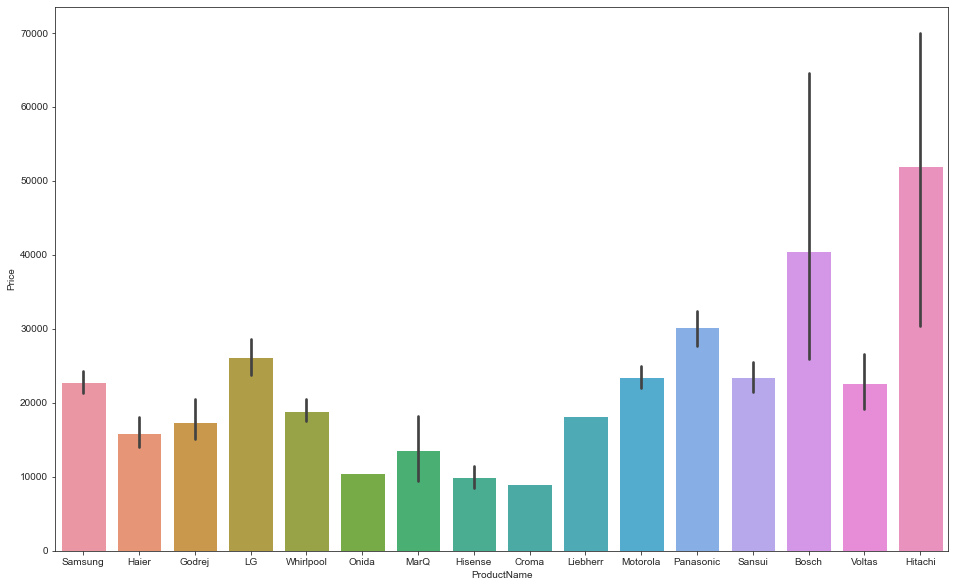

In [126]:
# barplot represents the distribution of price of different brands 

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "ProductName", y = "Price", ax=ax, data=fridge_data)

<AxesSubplot:xlabel='ProductName', ylabel='Price'>

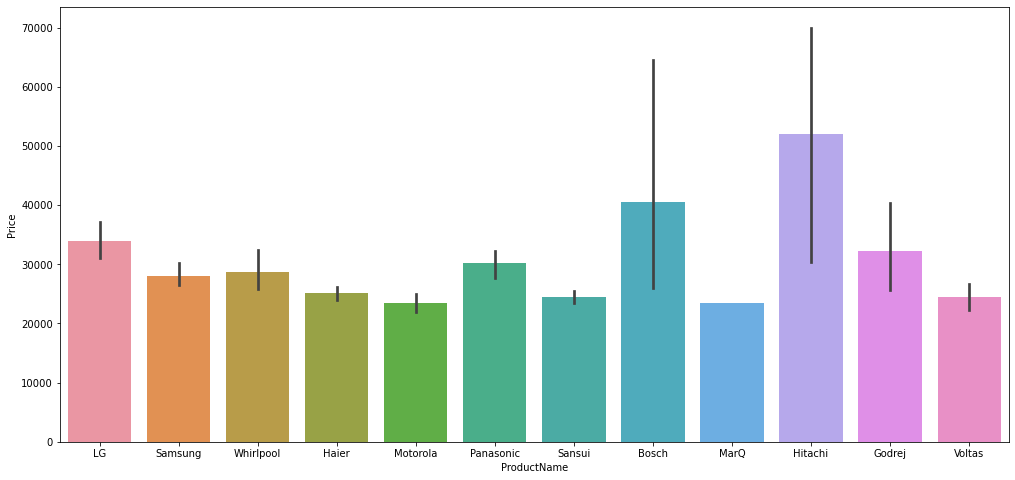

In [44]:
#barplot shows the cars which are high cost than average price

fridge_hprice = fridge_data[fridge_data['Price']>21947]
a4_dims = (17,8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data= fridge_hprice, x='ProductName',y='Price')

<AxesSubplot:xlabel='compressortypes'>

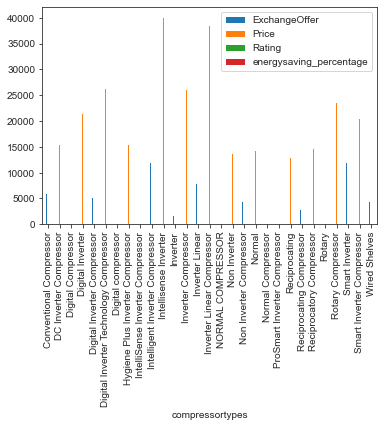

In [87]:
#plot tells about compressortypes with respect to price, exchange offer, rating, energysaving percentage

pd.pivot_table(fridge_data, index=['compressortypes']).plot(kind='bar')

<AxesSubplot:xlabel='compressortypes', ylabel='Price'>

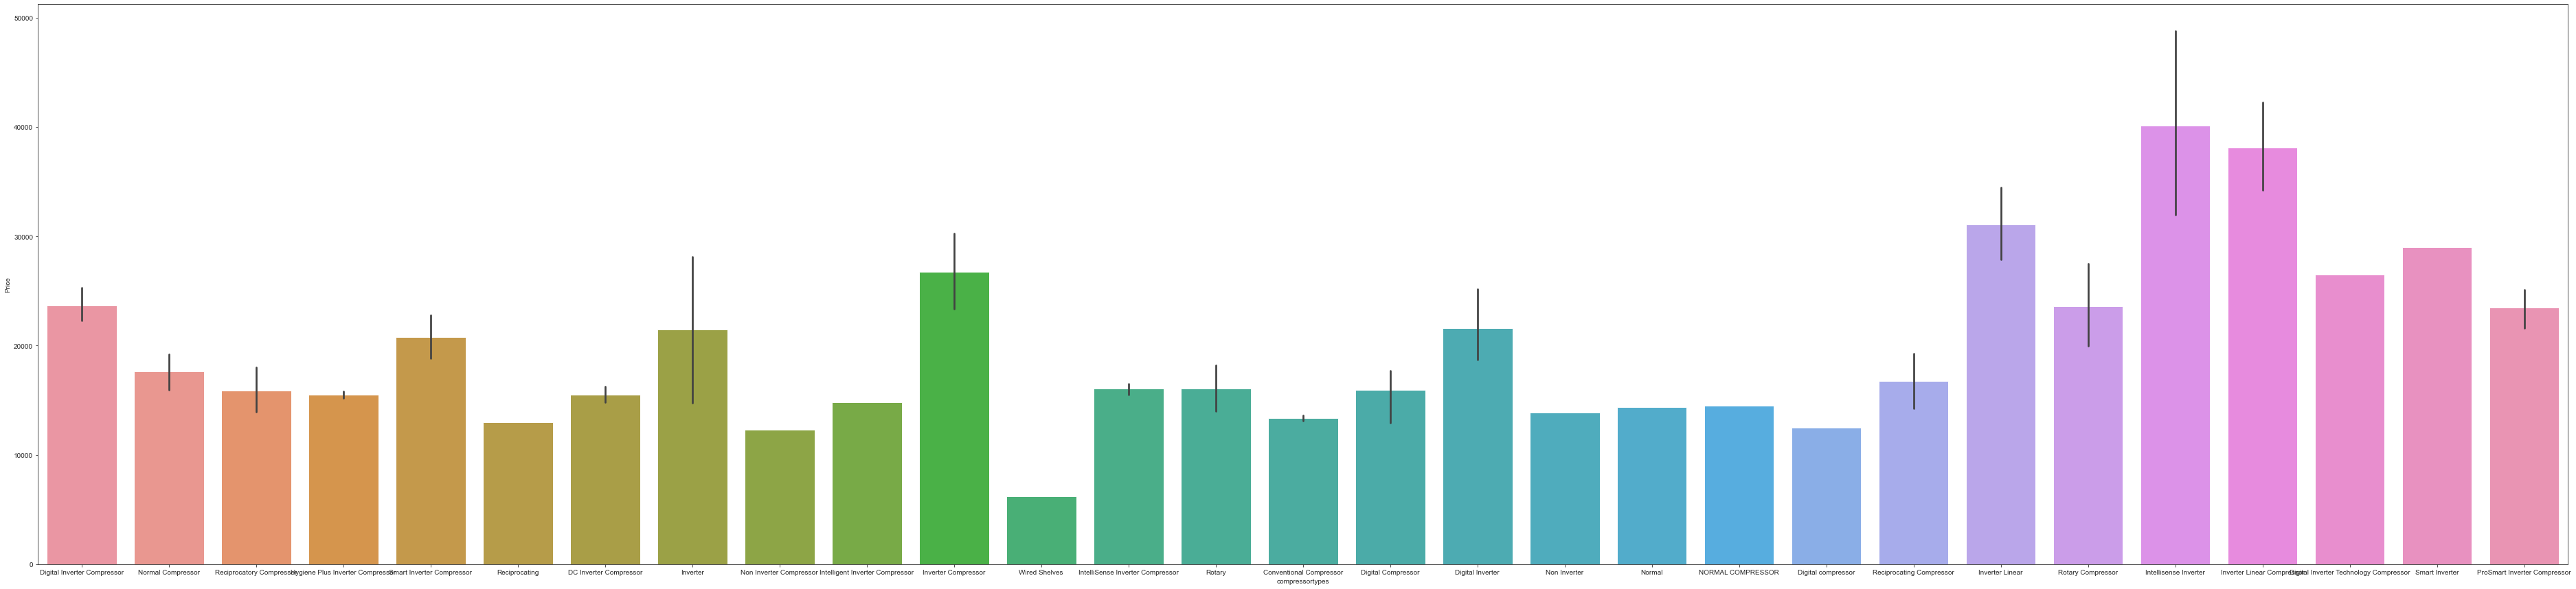

In [438]:
# here barplot shows price with respect to compressortypes

fig_dims = (66, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "compressortypes", y = "Price", ax=ax, data=fridge_data)

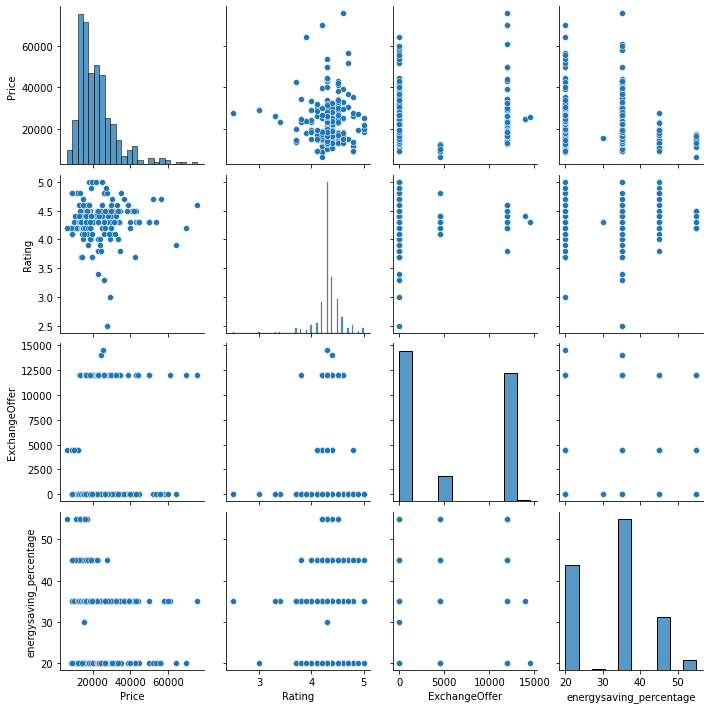

In [48]:
# plot represents complete details of every pair that how they are distributed/spread

sns.pairplot(data=fridge_data)

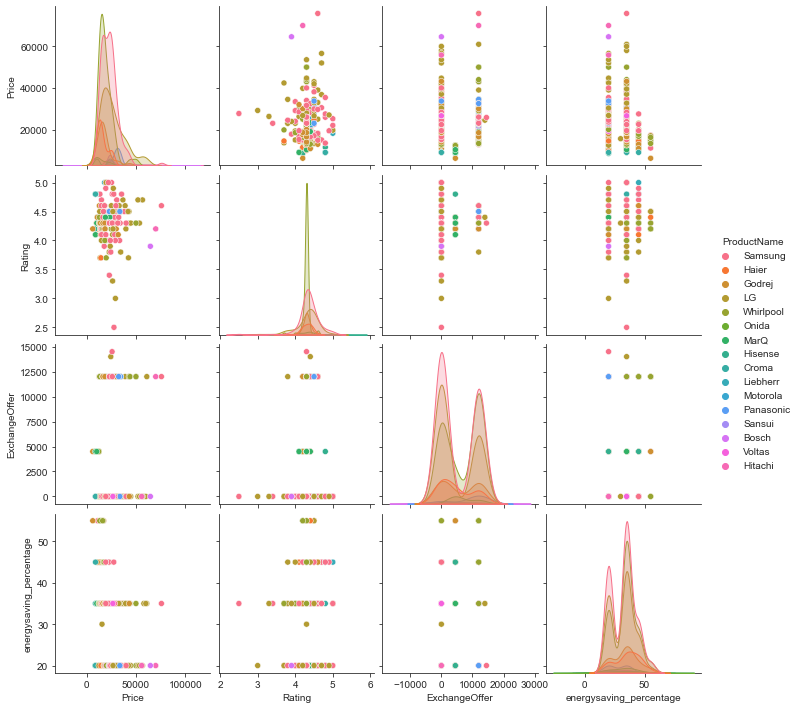

In [49]:
sns.set_style("ticks")
sns.pairplot(fridge_data,hue = 'ProductName',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='ProductName', ylabel='Price'>

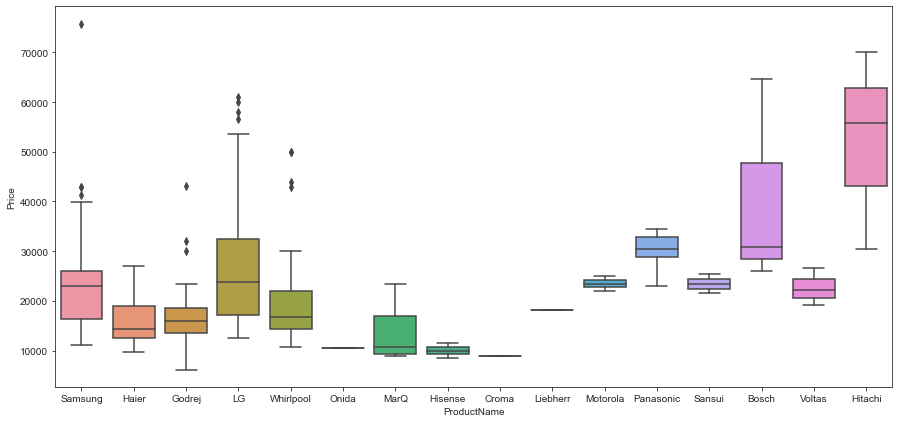

In [50]:
# plot represents the distribution of data and the outliers represent how far they are from median

plt.figure(figsize=(15,7))
sns.boxplot(x=fridge_data['ProductName'], y=fridge_data['Price'])

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='ProductName', ylabel='count'>

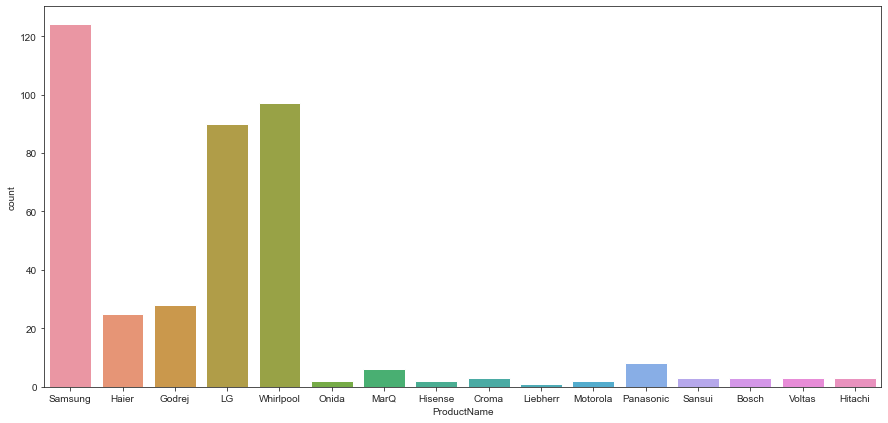

In [51]:
#plot represents the frequency of number of prodcuts in the available data

plt.figure(figsize=(15,7))
sns.countplot(fridge_data['ProductName'])

<Figure size 1008x576 with 0 Axes>

<AxesSubplot:xlabel='ProductName', ylabel='Rating'>

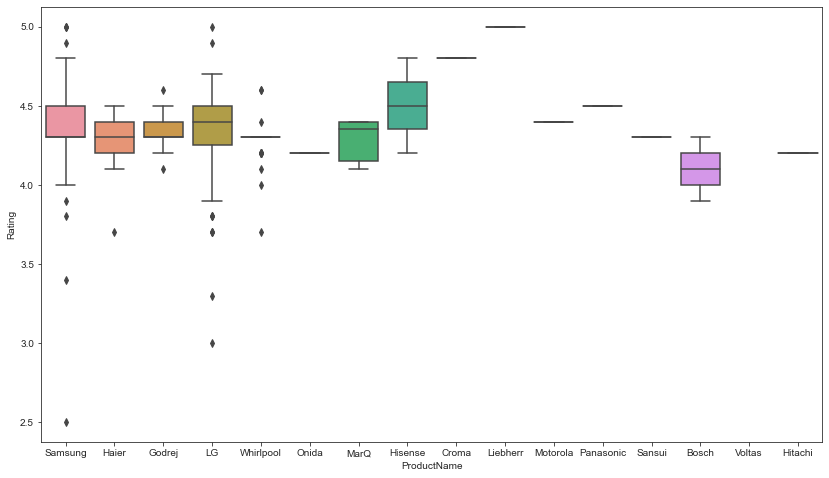

In [135]:
# here the boxplot shows most of distribution in the box and outliers which are far away from median

plt.figure(figsize=(14,8))
sns.boxplot(x=fridge_data['ProductName'],y=fridge_data['Rating'])

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='ProductName', ylabel='Rating'>

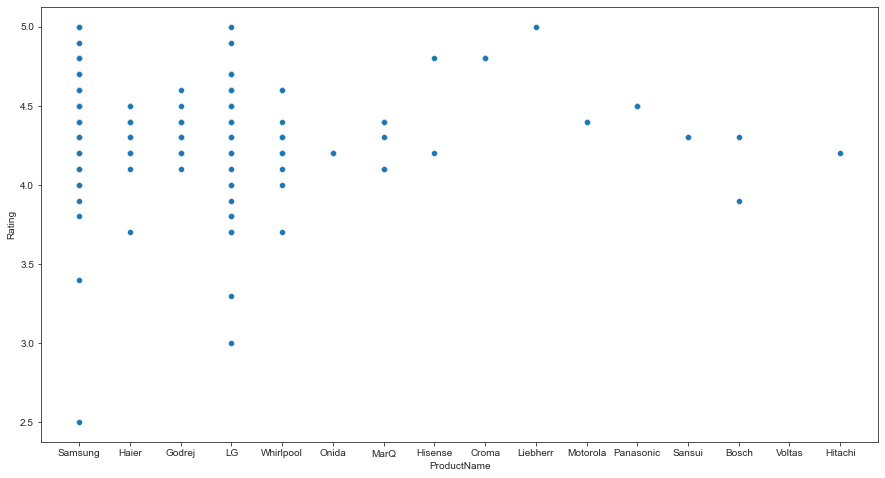

In [53]:
# here plot shows most of the distribution of rating of refridgerators with respect to brands

plt.figure(figsize=(15,8))
sns.scatterplot(data = fridge_data, x='ProductName', y = 'Rating')

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='stars', ylabel='Price'>

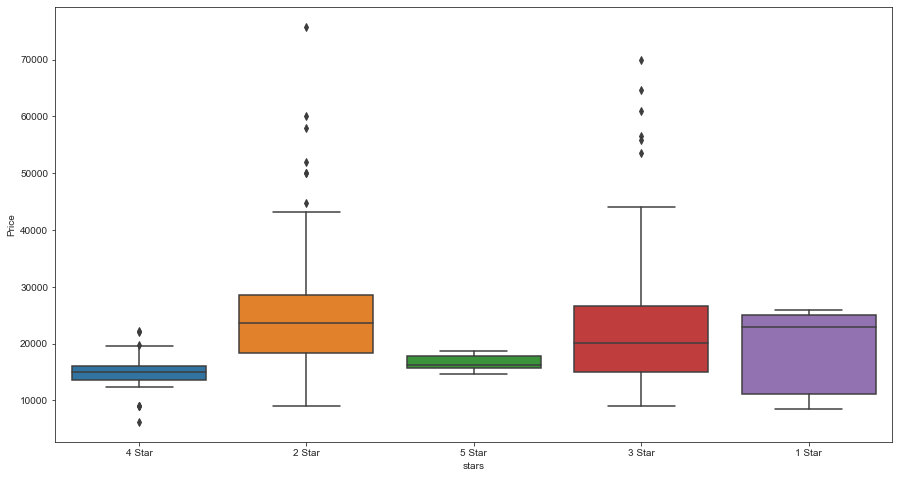

In [54]:
# visualisation of boxplot for refridgerator stars column with respect to price 

# here 4 star and 5 star fridges price are less and also available in less quantity

plt.figure(figsize=(15,8))
sns.boxplot(x=fridge_data['stars'],y=fridge_data['Price'])

<AxesSubplot:xlabel='ProductName', ylabel='Price'>

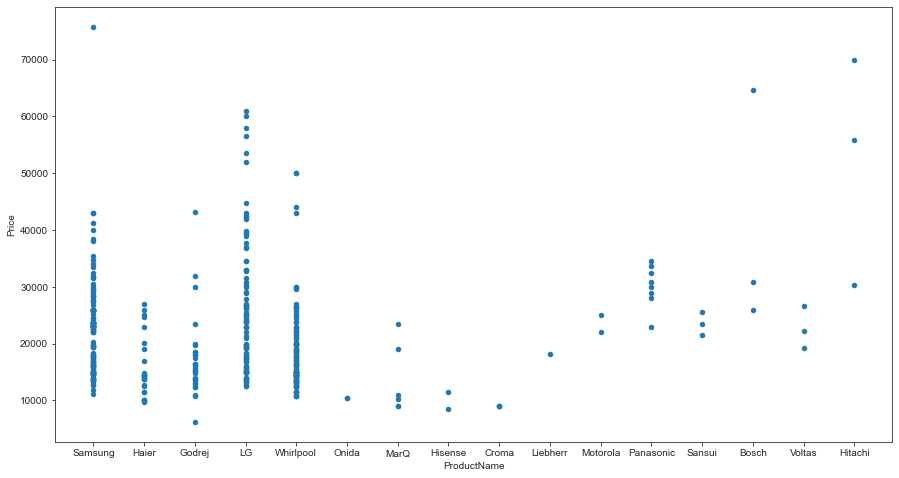

In [62]:
fridge_data.plot(x='ProductName',y='Price',kind='scatter',figsize=(15,8))

<Figure size 2520x576 with 0 Axes>

<BarContainer object of 400 artists>

Text(0.5, 0, 'fridgecapacity')

Text(0, 0.5, 'Prices')

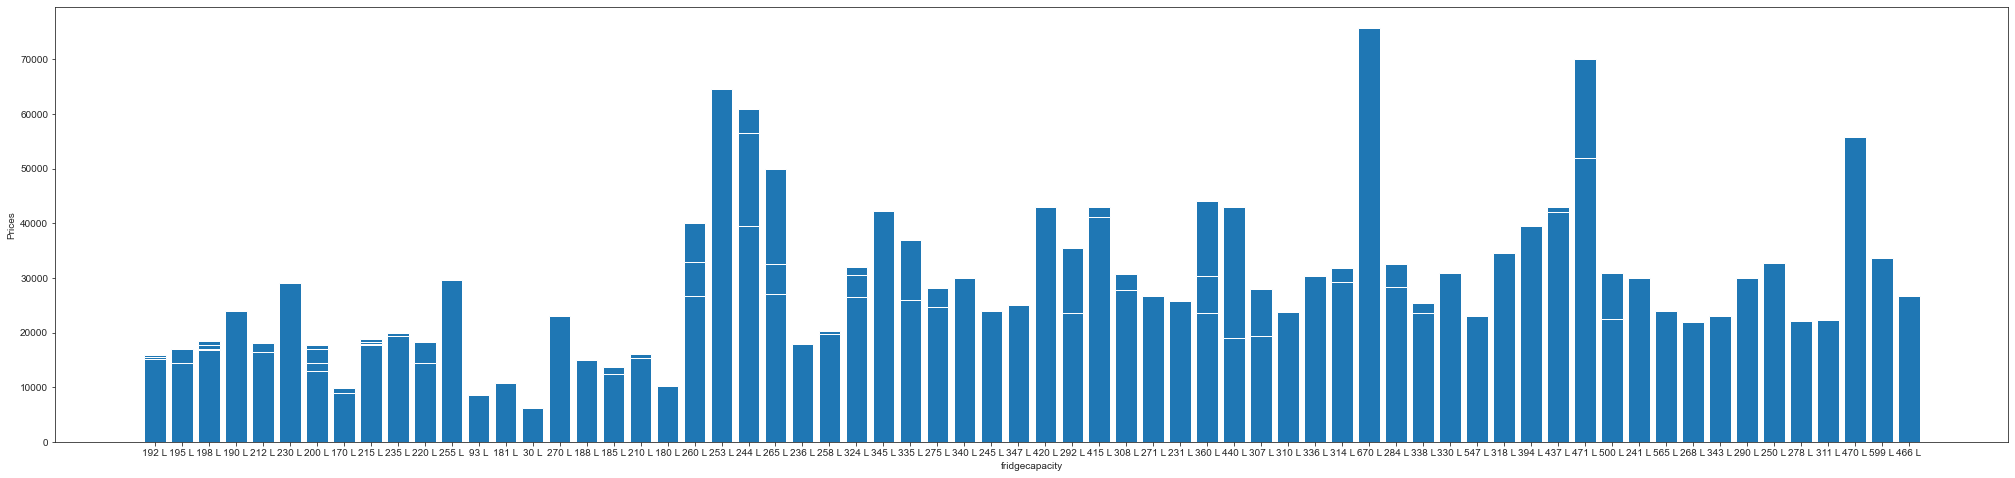

In [69]:
# here plot gives visualization of fridgecapacity with its price

plt.figure(figsize=(35,8))

plt.bar(fridge_data['fridgecapacity'],fridge_data['Price'])

plt.xlabel('fridgecapacity')
plt.ylabel('Prices')

plt.show()

<Figure size 1152x1080 with 0 Axes>

<BarContainer object of 400 artists>

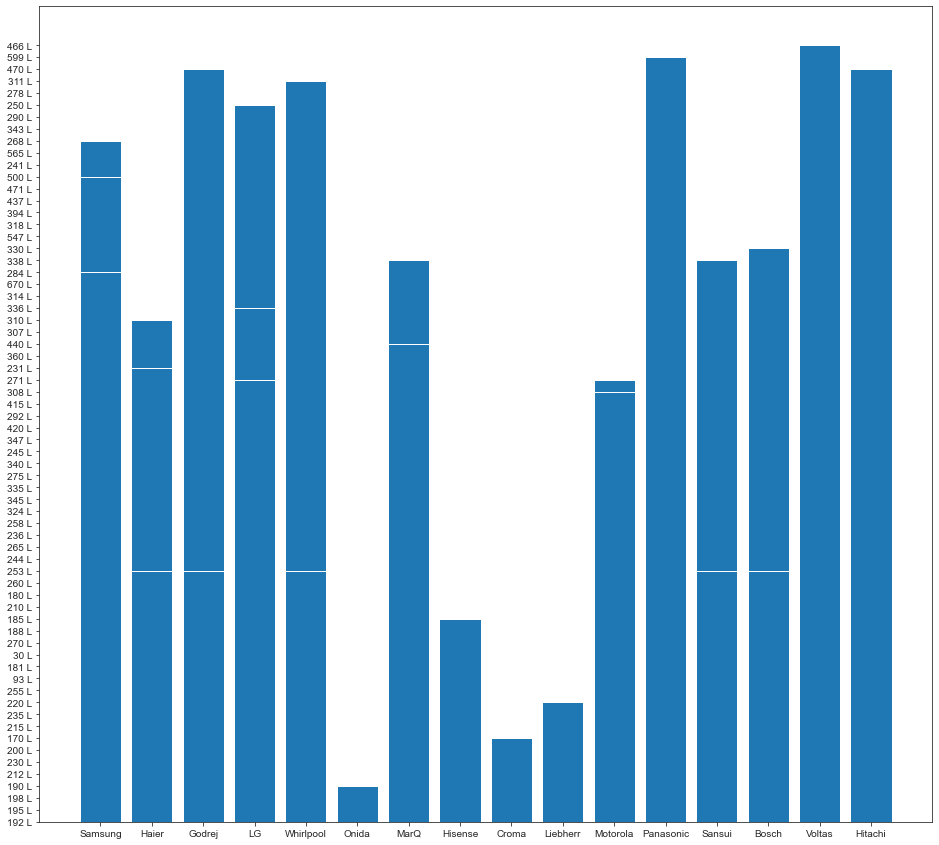

In [149]:
#the barplot visualizes that about every brand of refridgerator with its capacity

plt.figure(figsize=(16,15))

plt.bar(fridge_data['ProductName'],fridge_data['fridgecapacity'])
plt.show()

In [76]:
fridge_data

,ProductName,Price,Rating,ExchangeOffer,EMIOption,compressortypes,adpattype,energysaving_percentage,stars,fridgeinside,compressorwarranty,productwarranty,fridgecapacity
0,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
1,Samsung,11790.0,4.4,4500.0,No Cost EMI,Normal Compressor,Good for couples,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
2,Samsung,15890.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,192 L
3,Haier,12490.0,4.4,4500.0,NaN,Reciprocatory Compressor,Good for couples,45,4 Star,Toughened Glass Shelves,10 Years,1 Year,195 L
4,Samsung,17290.0,4.5,12000.0,No Cost EMI,Digital Inverter Compressor,Good for couples,55,5 Star,Toughened Glass Shelves,10 Years,1 Year,198 L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Samsung,28300.0,NaN,0.0,NaN,Digital Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,284 L
396,LG,26599.0,4.5,0.0,NaN,Smart Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,2 Years,1 Year,260 L
397,LG,26750.0,4.2,0.0,NaN,Digital Inverter Compressor,Good for families,20,2 Star,Toughened Glass Shelves,10 Years,1 Year,271 L
398,Voltas,26599.0,NaN,0.0,NaN,ProSmart Inverter Compressor,Good for families,35,2 Star,Toughened Glass Shelves,10 Years,1 Year,466 L


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='compressortypes'>

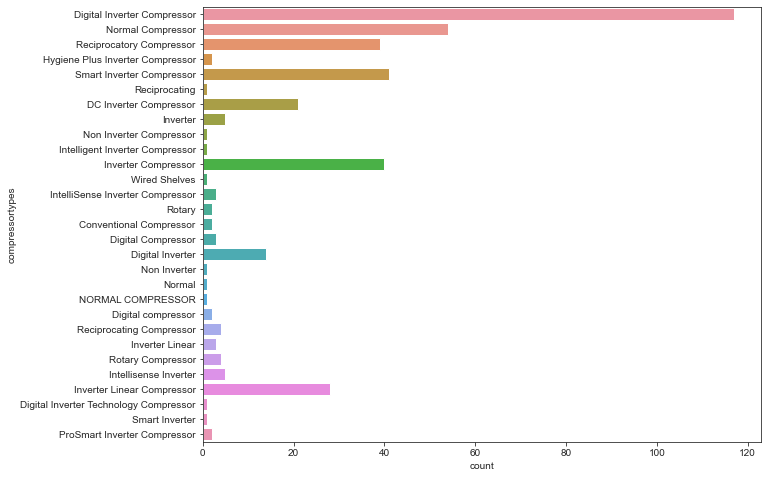

In [81]:
#plot shows how many number of compressortypes are present

plt.figure(figsize=(10,8))
sns.countplot(data=fridge_data , y= 'compressortypes')

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Price'>

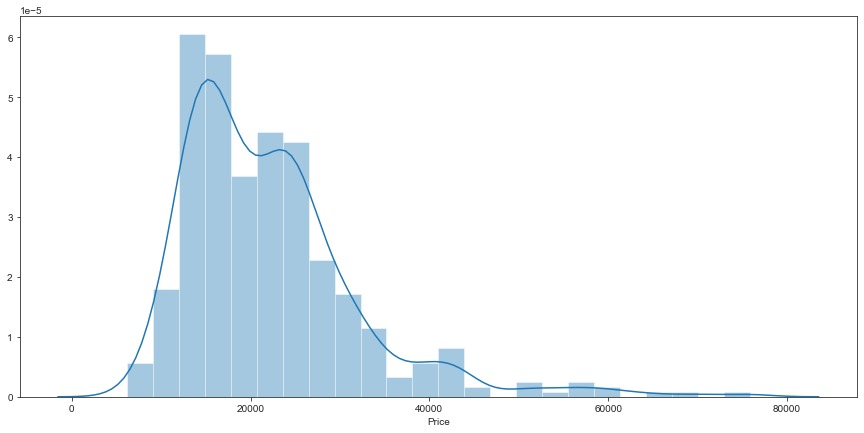

In [391]:
# here plot visulasizes about the price of data which exists more distribution

plt.figure(figsize=(15,7))
sns.distplot(df['Price'])

<Figure size 4320x648 with 0 Axes>

<AxesSubplot:xlabel='compressortypes', ylabel='Price'>

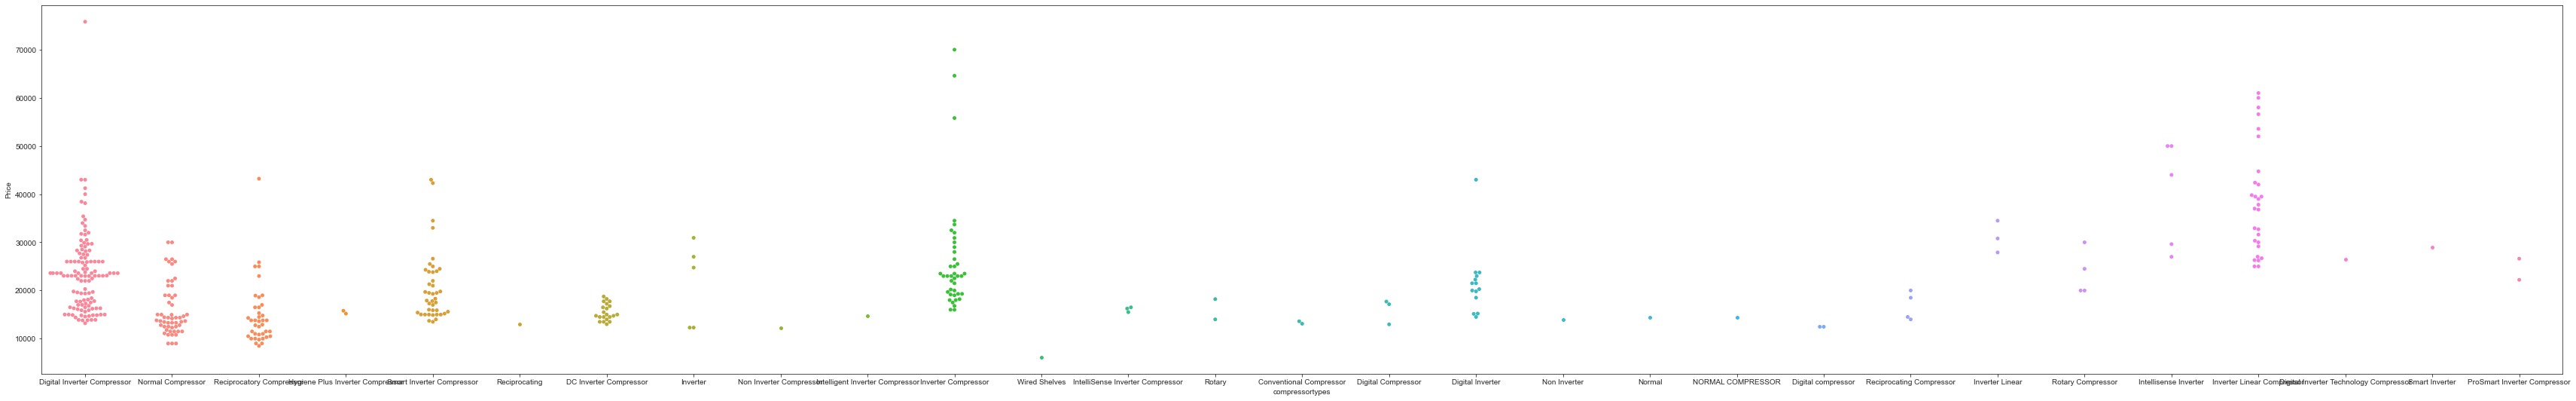

In [442]:
plt.figure(figsize=(60,9))
sns.swarmplot(x='compressortypes',y='Price', data = df1)
plt.show()

<Figure size 4320x648 with 0 Axes>

<AxesSubplot:xlabel='compressortypes', ylabel='Rating'>

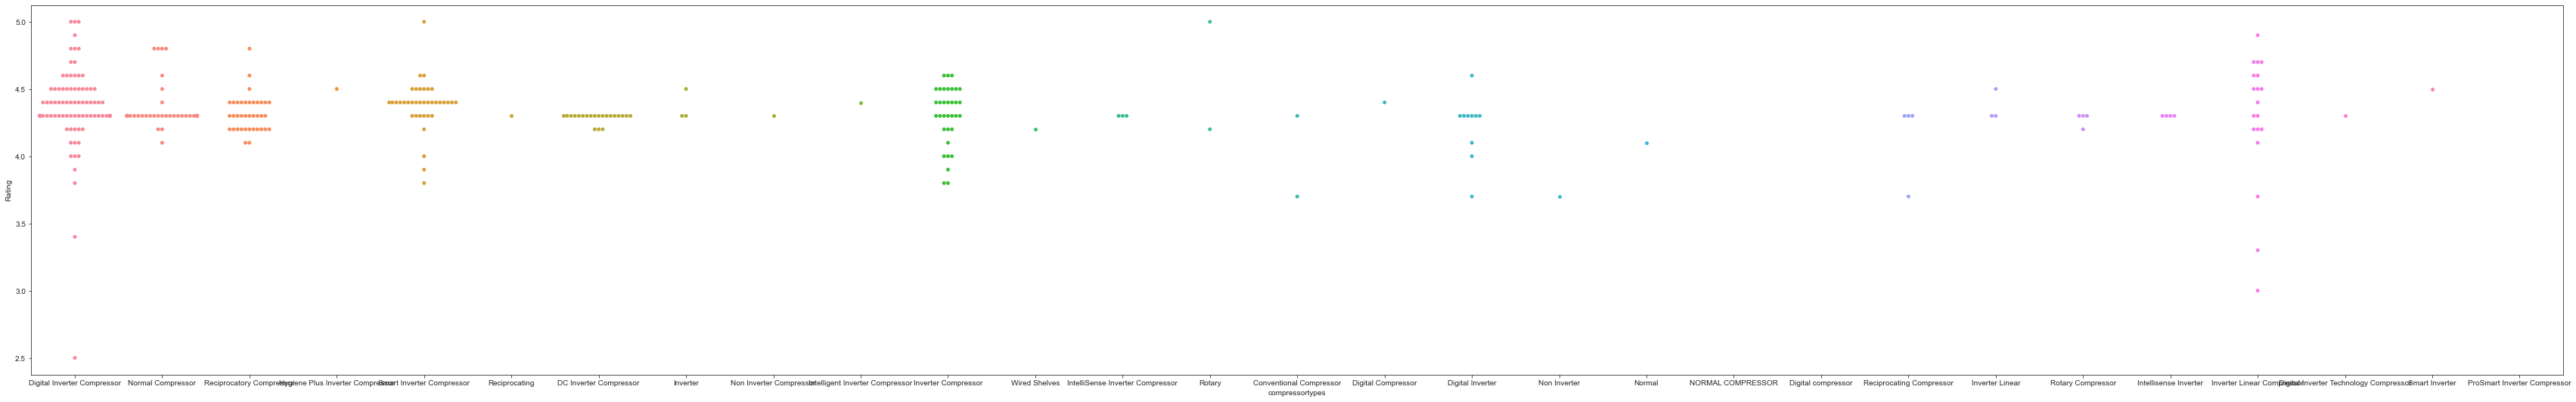

In [444]:
plt.figure(figsize=(60,9))
sns.swarmplot(x='compressortypes',y='Rating', data = df1)
plt.show()

<AxesSubplot:xlabel='ProductName', ylabel='Rating'>

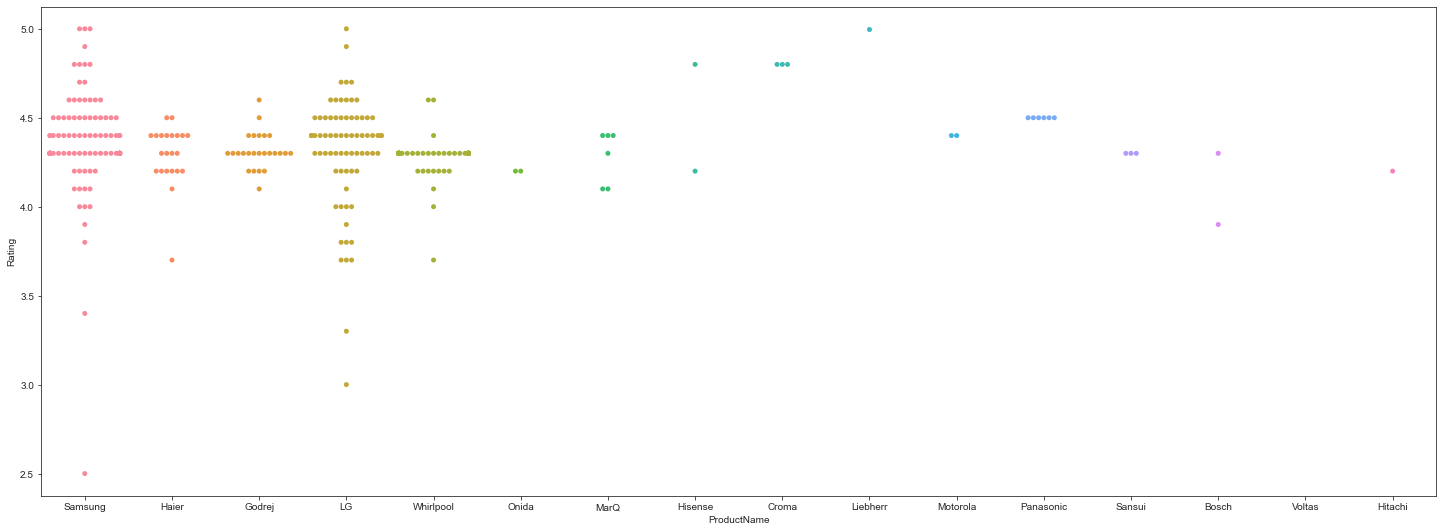

In [413]:
sns.swarmplot(x = "ProductName", y = "Rating", data = df1)

<AxesSubplot:xlabel='ProductName', ylabel='Price'>

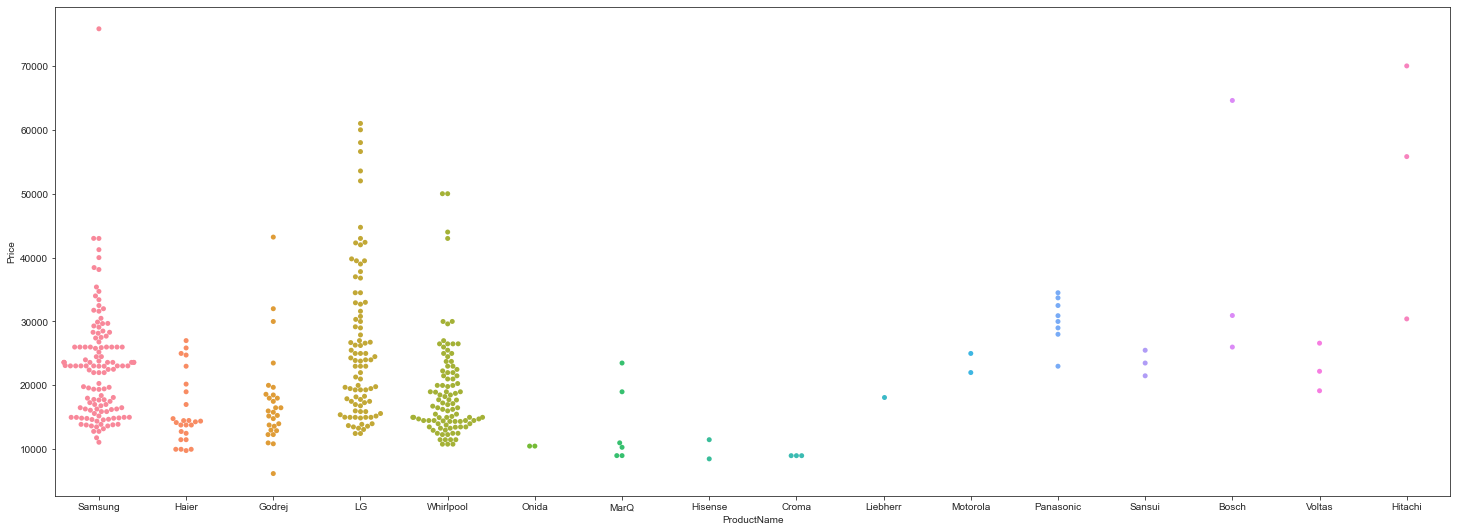

In [412]:
sns.swarmplot(x = "ProductName", y = "Price", data = df1)

<AxesSubplot:xlabel='ProductName', ylabel='ExchangeOffer'>

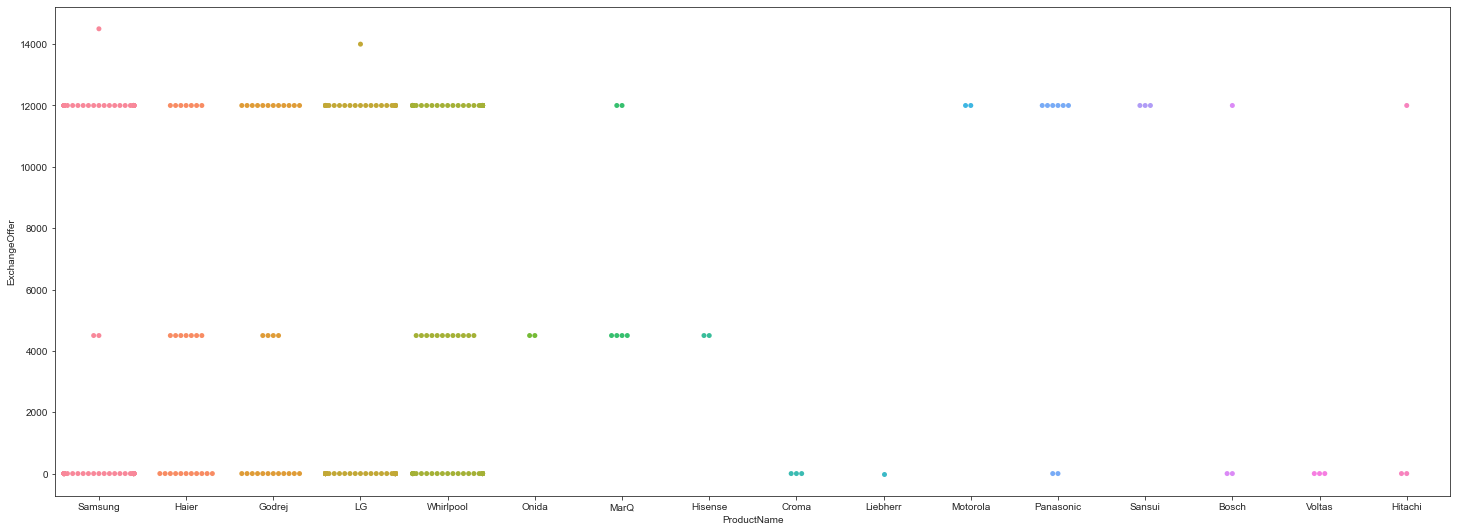

In [433]:
sns.swarmplot(x='ProductName', y ='ExchangeOffer', data = df1)

<AxesSubplot:xlabel='stars', ylabel='Price'>

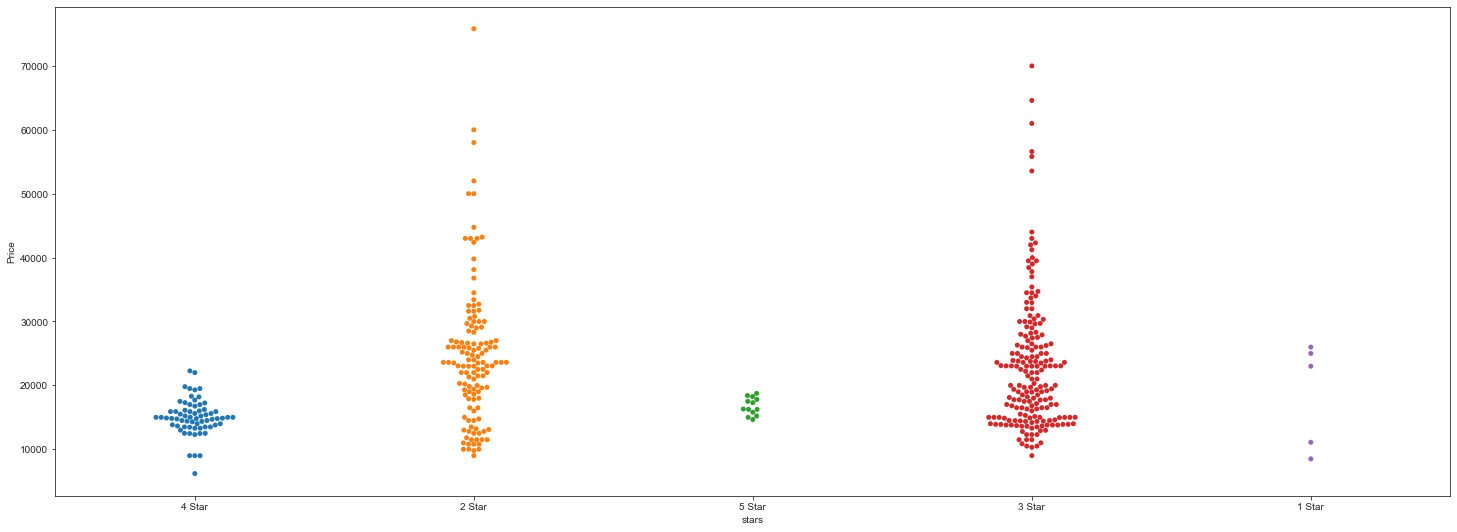

In [411]:
sns.swarmplot(x = "stars", y = "Price", data = df1)

<BarContainer object of 400 artists>

Text(0.5, 0, 'star')

Text(0, 0.5, 'prices')

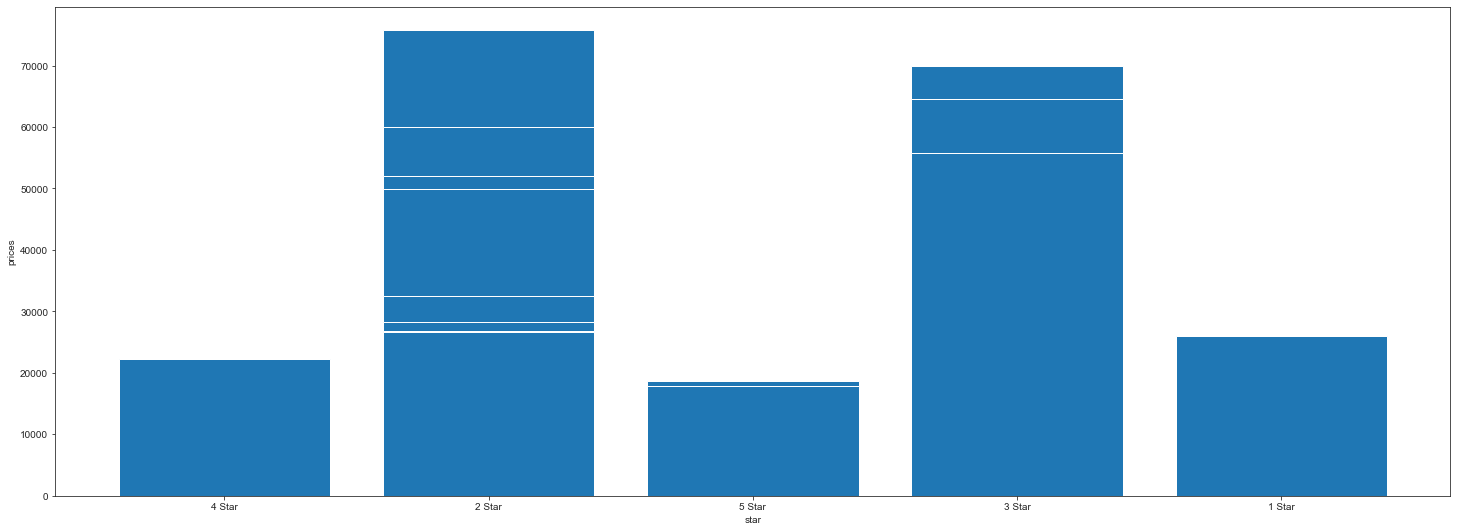

In [417]:
plt.bar(df1['stars'],df1['Price'])
plt.xlabel('star')
plt.ylabel('prices')